# Azure Batch - G2


## Domain:
#### Automobile Industry

## About:
#### The XYZ automobile company in India wants to enter the business of selling used cars. They would like to analyse the business challenges before the venture. 


#### Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
from IPython.display import display
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import time
import matplotlib.ticker as ticker
import statistics

#### Importing File Car_Sales CSV File and displaying first 5 entries of our Data Set

In [2]:
car_data = pd.read_csv('Car_sales_transactions.csv', sep=",",header = 0, encoding='latin')
car_data.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5


In [3]:
car_data.shape

(7906, 16)

#### Displaying all the column names.

In [4]:
car_data.columns

Index(['Sales_ID', 'Name', 'Year', 'Selling_Price', 'km_Driven', 'City_Code',
       'State_Code', 'Postal_Code', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats'],
      dtype='object')

#### Importing data from Sales Status and City Master File and merging it with the data and displaying first five entries

In [5]:
sales_status = pd.read_csv('Sales_Status.csv')
city_master = pd.read_excel('City_Master.xlsx')
region = pd.read_excel('Region_Master.xlsx')
region_state = pd.read_excel('Region_State_Mapping.xlsx')
state = pd.read_excel('State_Master.xlsx')
car_data = pd.merge(car_data,city_master[['City_Code','City_Name']],how ='left',on='City_Code')
car_data = pd.merge(car_data,region_state, how ='left',on='State_Code')
car_data = pd.merge(car_data,sales_status, how = 'left', on='Sales_ID')
car_data = pd.merge(car_data,state, how = 'left', on='State_Code')
car_data = pd.merge(car_data,region, how = 'left', on='Region_Code')
car_data.head()


,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,Owner,Mileage,Engine,Max_Power,Seats,City_Name,Region_Code,Sold,State_Name,Region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Mumbai,R3,Y,Maharashtra,West
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Ranchi,R2,Y,Jharkhand,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Noida,R1,Y,Uttar Pradesh,Central
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Dehradun,R1,Y,Uttarakhand,Central
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Chennai,R4,Y,Tamil Nadu,South


#### Checking the datatypes of our dataset

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   Name           7906 non-null   object
 2   Year           7906 non-null   int64 
 3   Selling_Price  7906 non-null   int64 
 4   km_Driven      7906 non-null   int64 
 5   City_Code      7906 non-null   object
 6   State_Code     7906 non-null   object
 7   Postal_Code    7906 non-null   int64 
 8   Fuel           7906 non-null   object
 9   Seller_Type    7906 non-null   object
 10  Transmission   7906 non-null   object
 11  Owner          7906 non-null   object
 12  Mileage        7906 non-null   object
 13  Engine         7906 non-null   object
 14  Max_Power      7906 non-null   object
 15  Seats          7906 non-null   int64 
 16  City_Name      7906 non-null   object
 17  Region_Code    7906 non-null   object
 18  Sold           7906 non-null

#### Coverting Mileage, Power and Engine from String to Float Values

In [7]:
car_data['Mileage_float'] = car_data['Mileage'].str[:-5]
car_data['Power'] = car_data['Max_Power'].str[:-4]
car_data['Mileage_float'] = car_data['Mileage_float'].apply(pd.to_numeric)
car_data['Power'] = car_data['Power'].apply(pd.to_numeric)
car_data['Power']
car_data['Engine_cc'] = car_data['Engine'].str.split(pat=" ",expand=True)[0].astype(int)

#### After converting checking the data types again 

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_ID       7906 non-null   int64  
 1   Name           7906 non-null   object 
 2   Year           7906 non-null   int64  
 3   Selling_Price  7906 non-null   int64  
 4   km_Driven      7906 non-null   int64  
 5   City_Code      7906 non-null   object 
 6   State_Code     7906 non-null   object 
 7   Postal_Code    7906 non-null   int64  
 8   Fuel           7906 non-null   object 
 9   Seller_Type    7906 non-null   object 
 10  Transmission   7906 non-null   object 
 11  Owner          7906 non-null   object 
 12  Mileage        7906 non-null   object 
 13  Engine         7906 non-null   object 
 14  Max_Power      7906 non-null   object 
 15  Seats          7906 non-null   int64  
 16  City_Name      7906 non-null   object 
 17  Region_Code    7906 non-null   object 
 18  Sold    

## Check Point 1

## Task 1.1(Data Manipulation using Python) 

### Q1 How the sold cars depend on the Fuel, Mileage, Power and Selling Price.
##### We found that Dieseled Cars are having high Power but less Mileage

In [9]:
car_data.query("Sold =='Y'").groupby(['Sold','Fuel']).agg({'Mileage_float':np.mean,'Power':np.mean}).sort_values(['Fuel'],ascending = False)

Mileage_float       Power
Sold Fuel                             
Y    Petrol      18.995936   81.794000
     LPG         21.108333   58.616667
     Diesel      19.366492  101.923108
     CNG         25.314286   56.080000

##### Then Comapred the Fuel with the Selling Price and Car Driven
##### We Concluded that Selling Price of Cars are more which are having more Power and Selling Price of Diseled Car is more.

In [10]:
car_data.groupby(['Fuel','Sold']).agg({'Mileage_float':np.mean,'Power':np.mean,'km_Driven':np.mean,'Selling_Price':np.mean}).sort_values(['Fuel'],ascending = False)

Mileage_float       Power     km_Driven  Selling_Price
Fuel   Sold                                                        
Petrol N         19.113540   79.585652  51883.683946  462360.887814
       Y         18.995936   81.794000  51532.865241  501153.604278
LPG    N         18.053448   59.479310  87275.310345  212896.551724
       Y         21.108333   58.616667  96500.000000  201166.666667
Diesel N         19.732088  101.451224  83124.325839  791287.744995
       Y         19.366492  101.923108  83923.622624  836903.476236
CNG    N         24.281778   61.757333  67459.355556  311022.177778
       Y         25.314286   56.080000  52142.857143  362142.714286

##### Which type of fueled cars are Sold more ? 
##### If comparing the more number of cars sold are of Diesel but percentage of sold cars is more of Petrol Cars.

In [11]:
group_column = 'Fuel'
display_name = 'Fuel'
group_df = car_data.groupby([group_column,'Sold'],as_index=False).agg({'Name':'count'})
group_df = group_df.pivot(index=group_column,columns='Sold',values='Name').fillna(0)
group_df['Total'] = group_df['N'] + group_df['Y']
group_df['% Sold'] = ((group_df['Y'] / group_df['Total'])*100).round(2)
group_df.sort_values(by='% Sold',ascending=False, inplace=True)
group_df.reset_index(inplace=True)
group_df.rename(columns={'Y':'Sold',group_column:display_name,'N':'Not Sold'},inplace=True)
display(group_df)

Sold,Fuel,Not Sold,Sold,Total,% Sold
0,Petrol,2585,935,3520,26.56
1,Diesel,3247,1052,4299,24.47
2,LPG,29,6,35,17.14
3,CNG,45,7,52,13.46


### Q2 How is Fuel related to Brand?

##### Extract the brand from the Name of the Cars

In [12]:
brand = car_data['Name'].str.split(expand = True)
# print(brand)
car_data['Brand'] = brand[0]

##### With the below query we tried to extract the brands of which type of Fueled cars are Sold.
##### After that we concluded that Sales of the most of the Dieseled cars are more of all the Brands

In [13]:
car_data.query("Sold == 'Y'").groupby(['Brand','Fuel']).agg({'Fuel':np.size}).rename(columns={'Fuel':'No of sold Cars'})


No of sold Cars
Brand         Fuel                   
Audi          Diesel                9
BMW           Diesel               27
              Petrol                2
Chevrolet     Diesel               32
              Petrol               24
Daewoo        Petrol                1
Datsun        Petrol               16
Fiat          Diesel                6
Force         Diesel                1
Ford          Diesel               65
              Petrol               27
Honda         Diesel               30
              Petrol               94
Hyundai       Diesel              124
              LPG                   1
              Petrol              207
Jaguar        Diesel               21
Jeep          Diesel                5
              Petrol                4
Kia           Diesel                2
Land          Diesel                1
Lexus         Petrol               11
MG            Petrol                2
Mahindra      Diesel              191
              Petrol               10
Maruti        CNG                   7
              Diesel              201
              LPG                   5
              Petrol              384
Mercedes-Benz Diesel               14
              Petrol                2
Mitsubishi    Diesel                3
Nissan        Diesel               17
              Petrol               16
Renault       Diesel               21
              Petrol               35
Skoda         Diesel                8
              Petrol               12
Tata          Diesel              141
              Petrol               37
Toyota        Diesel               88
              Petrol               38
Volkswagen    Diesel               27
              Petrol               12
Volvo         Diesel               18
              Petrol                1

### Q3 Which brands are selling most?
##### Based on the below Query we concluded Maruti Car Brands are sold more

In [14]:
car_data.query("Sold == 'Y'").groupby(['Brand']).agg({'Sold':np.size}).rename(columns={'Sold':'NoOfCarsSold'}).sort_values(['NoOfCarsSold'],ascending=False)

,NoOfCarsSold
Brand,
Maruti,597
Hyundai,332
Mahindra,201
Tata,178
Toyota,126
Honda,124
Ford,92
Chevrolet,56
Renault,56


##### Further we found most of the Maruti Cars are Sold in Mangalore

In [15]:
#No of cars sold brandwise on each region by brand
car_data.query("Sold == 'Y' and Brand == 'Maruti'").groupby(['Brand','City_Name'],as_index=False).size().rename(columns={'size':'Total_Sold'}).sort_values('Total_Sold',ascending = False).reset_index(drop=True)

,Brand,City_Name,Total_Sold
0,Maruti,Mangalore,32
1,Maruti,Dehradun,30
2,Maruti,Surat,27
3,Maruti,Hyderabad,25
4,Maruti,Kochi,25
5,Maruti,Vellore,24
6,Maruti,Mumbai,24
7,Maruti,Mysore,23
8,Maruti,Gangtok,23
9,Maruti,Noida,23


##### Compared how the Sold Cars Brands are related to the Selleing Price and which type of brands are sold more comparing individually.

In [16]:
car_sold = car_data.query("Sold == 'Y'").groupby(['Brand'], as_index=False).agg({'Selling_Price':np.mean,'Sold':np.size}).sort_values(['Selling_Price','Brand'],ascending=False)
car_sold['Total'] = 0
for ind in car_sold.index:
    car_sold['Total'][ind] = car_data[car_data['Brand']==car_sold['Brand'][ind]].shape[0]
car_sold['Percentage'] = (car_sold['Sold']/car_sold['Total'])*100
car_sold['Selling_Price'] = car_sold['Selling_Price']/100000
car_sold.rename(columns={'Selling_Price':'Selling_Price (in lakhs)'}).sort_values('Percentage',ascending=False).reset_index(drop = True)


,Brand,Selling_Price (in lakhs),Sold,Total,Percentage
0,MG,18.250000,2,3,66.666667
1,Kia,12.715000,2,4,50.000000
2,Nissan,4.209696,33,81,40.740741
3,Daewoo,1.000000,1,3,33.333333
4,Lexus,51.500000,11,34,32.352941
5,Mercedes-Benz,27.671875,16,54,29.629630
6,Jaguar,29.178571,21,71,29.577465
7,Jeep,25.516666,9,31,29.032258
8,Volvo,35.473684,19,67,28.358209
9,Toyota,10.855555,126,452,27.876106


### Q4 Are there specific locations selling more?
##### We concluded most of the cars are sold in Mysore individually as well as by comparing the other locations as well

In [17]:
car_city = car_data.query("Sold == 'Y'").groupby(['Region','State_Name','City_Name']).agg({'Sold':np.size}).sort_values(['Sold'],ascending=False)
car_city['Total'] = 0
car_city['Percentage'] = 0
for index in car_city.index:
    car_city['Total'][index] = car_data[car_data['City_Name'] == index[2]].shape[0]
car_city['Percentage']= (car_city['Sold']/car_city['Total'])*100
car_city.sort_values('Percentage',ascending=False)

Sold  Total  Percentage
Region     State_Name     City_Name                            
South      Karnataka      Mysore          83    279   29.749104
West       Gujarat        Surat           70    242   28.925620
South      Tamil Nadu     Vellore         81    293   27.645051
           Telangana      Hyderabad       72    262   27.480916
           Karnataka      Mangalore       76    279   27.240143
Central    Madhya Pradesh Indore          69    257   26.848249
North East Sikkim         Gangtok         69    257   26.848249
East       Bihar          Patna           69    257   26.848249
Central    Uttar Pradesh  Noida           80    303   26.402640
East       Jharkhand      Jamshedpur      65    247   26.315789
Central    Uttar Pradesh  kanpur          65    247   26.315789
South      Tamil Nadu     Coimbatore      77    294   26.190476
West       Gujarat        Ahmedabad       72    278   25.899281
           Maharashtra    Mumbai          77    298   25.838926
East       West Bengal    Kolkata         69    268   25.746269
North      Punjab         Ludhiana        63    249   25.301205
South      Tamil Nadu     Chennai         72    285   25.263158
           Kerala         Thrissur        68    270   25.185185
East       Odisha         Bhubaneshwar    64    255   25.098039
Central    Uttarakhand    Dehradun        70    280   25.000000
North      Delhi          Delhi           80    320   25.000000
West       Gujarat        Vadodara        66    272   24.264706
South      Andhra Pradesh Nellore         68    281   24.199288
           Karnataka      Bangalore       64    276   23.188406
East       Jharkhand      Ranchi          62    276   22.463768
South      Kerala         Kochi           62    279   22.222222
West       Maharashtra    Aurangabad      60    278   21.582734
                          Pune            52    250   20.800000
North      Rajasthan      Jaipur          55    274   20.072993

### Q5 Which factors which might help in Selling Prices ?

##### Type of Owners are also impacting Selling_Price of Cars

In [18]:
# car_data['Selling_Price'] = car_data['Selling_Price']/100000
car_owner = car_data.groupby(['Owner']).agg({'Selling_Price':(np.mean)}).sort_values(['Selling_Price'],ascending=False)
car_owner['Selling_Price'] = car_owner['Selling_Price']/100000
car_owner.rename(columns = {'Selling_Price':'Selling_Price(in lakhs)'})

,Selling_Price(in lakhs)
Owner,
Test Drive Car,44.038000
First Owner,7.899799
Second Owner,4.012035
Third Owner,2.931873
Fourth & Above Owner,2.331968


##### with the below query we concluded engine of which range of cars are Sold more

In [19]:
start = 600
end = 3800
bin_size = 200
bin_count = int((end-start)/bin_size)+1
bin_range = np.linspace(start,end,bin_count)
car_data['Engine_cc_bin'] = pd.cut(car_data['Engine_cc'], bins=bin_range).astype(str)
group_column = 'Engine_cc_bin'
display_name = 'Engine'
slice_df = car_data[(car_data['Selling_Price'].notnull()) & (car_data[group_column].notnull())]
group_df = slice_df.groupby([group_column,'Sold'],as_index=False).agg({'Selling_Price':'mean'})
group_df = group_df.pivot(index=group_column,columns='Sold',values='Selling_Price').fillna(0)
group_df.reset_index(inplace=True)
group_df['Y'] = (group_df['Y']/1000).astype(int)
group_df['N'] = (group_df['N']/1000).astype(int)
group_df.rename(columns={'Y':'Price (k) Sold',group_column:display_name,'N':'Price (k) Not Sold'},inplace=True)
group_df.sort_values(by='Engine',inplace=True)
display(group_df)

Sold,Engine,Price (k) Not Sold,Price (k) Sold
0,"(1000.0, 1200.0]",441,455
1,"(1200.0, 1400.0]",480,474
2,"(1400.0, 1600.0]",569,563
3,"(1600.0, 1800.0]",965,761
4,"(1800.0, 2000.0]",2388,2908
5,"(2000.0, 2200.0]",850,847
6,"(2200.0, 2400.0]",1287,773
7,"(2400.0, 2600.0]",955,960
8,"(2600.0, 2800.0]",1395,1907
9,"(2800.0, 3000.0]",1939,1923


##### Input Checklist for User based on the Inputs

In [20]:
paramter_check = ['Brand','Year','Name','Region','State_Name','City_Name','Seller_Type','km_Driven','Fuel','Engine','Seats','Transmission','Owner','Mileage','Max_Power']

km_Driven_range = [0,5000, 10000, 20000, 40000, 80000,160000,200000,250000,np.inf]

names = ['0-5K', '5K-10K', '10K-20K', '20K-40K', '40K-80K','80K-160K','160K-200K','200K-250K','250K+']

car_model_range = [0,1999,2005, 2011, 2015,2018,np.inf]

names_model = ['Antique(upto 1999)', 'Very Old(2000-2005)', 'Old(2006-2011)','Moderate(2012-2015)','Fair(2016-2018)','New(2019+)']

# car_min_selling_price = car_data.copy()
car_min_selling_price = car_data.query("Sold == 'Y'").groupby(paramter_check,as_index=False).agg({'Selling_Price':np.min}).rename(columns={'Selling_Price':'Min_Selling_Price_in_lakhs'}).sort_values(by=['Name','km_Driven'],ascending=[True,True])
car_min_selling_price.Min_Selling_Price_in_lakhs = car_min_selling_price.Min_Selling_Price_in_lakhs/100000

car_min_selling_price['km_Driven_range'] = pd.cut(car_min_selling_price['km_Driven'], km_Driven_range, labels=names)

car_min_selling_price['approx_Mileage'] = car_min_selling_price['Mileage'].str.split(' ', 1).str[0].astype('float64').apply(np.ceil)
# car_min_selling_price
car_min_selling_price['approx_Mileage'] = car_min_selling_price['approx_Mileage'].astype('str')
car_min_selling_price.km_Driven_range = car_min_selling_price.km_Driven_range.astype('object')
# car_min_selling_price.car_model_range = car_min_selling_price.car_model_range.astype('object')

car_min_selling_price['car_model_range'] = pd.cut(car_min_selling_price['Year'], car_model_range, labels=names_model)
# paramter_check = ['Brand','Year','Name','Region','State_Name','City_Name','Seller_Type','km_Driven','Fuel','Engine','Seats','Transmission','Owner','Mileage','Max_Power']
car_min_selling_price.car_model_range = car_min_selling_price.car_model_range.astype('object')


# car_min_selling_price.info()
input_dict = {'Brand':'Maruti','Fuel':'Diesel','approx_Mileage':'25.0'}
# input_check = ['Brand','Year','Name','Seller_Type','km_Driven','Mileage','Max_Power','Fuel','Engine','Seats','Transmission']
input_check = ['Brand','Year','Name','Seller_Type','km_Driven','Mileage','Max_Power','Fuel','Engine','Seats','Transmission','Owner']
#creating dynamic dataframe from the car_min_selling_price dataframe with the user input paramters to display minimum selling price for all brands
car_input_min_selling_price = car_min_selling_price[(car_min_selling_price[''.join(list(input_dict.keys())[0])]==''.join(list(input_dict.values())[0])) & (car_min_selling_price[''.join(list(input_dict.keys())[1])]==''.join(list(input_dict.values())[1])) & (car_min_selling_price[''.join(list(input_dict.keys())[2])]==''.join(list(input_dict.values())[2]))]
pd.pivot_table(car_input_min_selling_price,values=['Min_Selling_Price_in_lakhs'],index =input_check,columns=['car_model_range','km_Driven_range']).head(10).fillna(0).sort_values(by =['Year','Name'],ascending=[True,True])


Min_Selling_Price_in_lakhs  \
car_model_range                                                                                                                                          Fair(2016-2018)   
km_Driven_range                                                                                                                                                     0-5K   
Brand  Year Name                                    Seller_Type km_Driven Mileage    Max_Power Fuel   Engine  Seats Transmission Owner                                     
Maruti 2016 Maruti Ertiga SHVS LDI Option           Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       Second Owner                        0.0   
            Maruti Ertiga SHVS VDI                  Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       Second Owner                        0.0   
                                                                80000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner                         0.0   
            Maruti Ertiga SHVS ZDI Plus             Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner                         0.0   
            Maruti Vitara Brezza VDi                Individual  70000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner                         0.0   
            Maruti Vitara Brezza ZDi Plus           Dealer      63000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner                         0.0   
            Maruti Vitara Brezza ZDi Plus Dual Tone Individual  60000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner                         0.0   
                                                                90000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner                         0.0   
                                                                110000    24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       Second Owner                        0.0   
       2017 Maruti Ertiga SHVS VDI                  Individual  80000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner                         0.0   

                                                                                                                                                       \
car_model_range                                                                                                                                         
km_Driven_range                                                                                                                               10K-20K   
Brand  Year Name                                    Seller_Type km_Driven Mileage    Max_Power Fuel   Engine  Seats Transmission Owner                  
Maruti 2016 Maruti Ertiga SHVS LDI Option           Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       Second Owner     0.0   
            Maruti Ertiga SHVS VDI                  Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       Second Owner     0.0   
                                                                80000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner      0.0   
            Maruti Ertiga SHVS ZDI Plus             Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner      0.0   
            Maruti Vitara Brezza VDi                Individual  70000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner      0.0   
            Maruti Vitara Brezza ZDi Plus           Dealer      63000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner      0.0   
            Maruti Vitara Brezza ZDi Plus Dual Tone Individual  60000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner      0.0   
                                                  

## Task 1.3 (Statistical Analysis using Python)

### Q1 Descriptive statistics for both numerical and categorical and draw few insights from them.

In [21]:
car_data.describe(include='all')


,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,City_Name,Region_Code,Sold,State_Name,Region,Mileage_float,Power,Engine_cc,Brand,Engine_cc_bin
count,7906.000000,7906,7906.000000,7.906000e+03,7.906000e+03,7906,7906,7906.000000,7906,7906,...,7906,7906,7906,7906,7906,7906.000000,7906.000000,7906.000000,7906,7906
unique,NaN,1982,NaN,NaN,NaN,29,18,NaN,4,3,...,29,6,2,18,6,NaN,NaN,NaN,31,15
top,NaN,Maruti Swift Dzire VDI,NaN,NaN,NaN,CT09,ST24,NaN,Diesel,Individual,...,Delhi,R4,N,Tamil Nadu,South,NaN,NaN,NaN,Maruti,"(1000.0, 1200.0]"
freq,NaN,129,NaN,NaN,NaN,320,872,NaN,4299,6563,...,320,2798,5906,872,2798,NaN,NaN,NaN,2367,1786
mean,4070.106248,NaN,2013.983936,6.498137e+05,6.918866e+04,NaN,NaN,503562.180116,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.419861,91.587374,1458.708829,NaN,NaN
std,2345.770159,NaN,3.863695,8.135827e+05,5.679230e+04,NaN,NaN,204939.677172,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.036263,35.747216,503.893057,NaN,NaN
min,1.000000,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,110001.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,32.800000,624.000000,NaN,NaN
25%,2037.250000,NaN,2012.000000,2.700000e+05,3.500000e+04,NaN,NaN,391510.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.780000,68.050000,1197.000000,NaN,NaN
50%,4076.500000,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,524225.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.300000,82.000000,1248.000000,NaN,NaN
75%,6102.000000,NaN,2017.000000,6.900000e+05,9.542500e+04,NaN,NaN,680001.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.320000,102.000000,1582.000000,NaN,NaN


##### How Selling Price of Cars are related with time (Year)
##### As per the below query we saw with the increae in th number of sold Cars selling Price of Cars also increased with time.

In [22]:
car_year = car_data.groupby(['Year']).agg({'Selling_Price':np.mean}).sort_values(['Year'])
car_sold_year = car_data.query("Sold == 'Y'").groupby(['Year']).agg({'Sold':np.size}).sort_values(['Year'])
car_year['Selling_Price_diff'] = 0
car_year['Selling_Price_diff_per'] = 0
prv = car_year['Selling_Price'].head(1)
index = car_year['Selling_Price'].head(1).index
car_year['Selling_Price_diff'][index[0]] = 0
for index in car_year.index:
    car_year['Selling_Price_diff'][index] = float(car_year['Selling_Price'][index])-prv
    prv = car_year['Selling_Price'][index]
    car_year['Selling_Price_diff_per'][index] = (car_year['Selling_Price_diff'][index])/(prv)*100
car_year.sort_values(['Year'],ascending=False)

car_data.query("Sold == 'Y' and Year == index").shape[0]
car_year['Cars_Sold'] = 0
for index in car_year.index:
    if index in car_sold_year.index:
        car_year['Cars_Sold'][index] = car_sold_year['Sold'][index]
car_year['Selling_Price'] = car_year['Selling_Price']/100000
car_year.rename(columns= {'Selling_Price':'Selling_Price(in lakhs)','Selling_Price_diff':'Impact on Selling Price w.r.t previous Year','Selling_Price_diff_per':'% Increase/Decrease in Selling Price'}).sort_values(['Year'],ascending=False)

,Selling_Price(in lakhs),Impact on Selling Price w.r.t previous Year,% Increase/Decrease in Selling Price,Cars_Sold
Year,,,,
2020,8.852702,-891716.020699,-100.728116,19
2019,17.769863,818802.652414,46.078165,154
2018,9.581836,67990.560391,7.095776,187
2017,8.901930,189875.313325,21.329679,256
2016,7.003177,103547.454622,14.785782,225
2015,5.967703,80094.527742,13.421333,200
2014,5.166757,56011.120678,10.840672,144
2013,4.606646,107521.341064,23.340482,174
2012,3.531433,31046.831070,8.791568,159


##### With the increase in time Number of Sold Cars of Automatic Cars also Increasing.

In [23]:
car_data.query("Sold == 'Y'").groupby(['Year','Transmission']).agg({'Sold':np.size}).rename(columns = {'Sold':'No. of Sold Cars'}).sort_values(['Year','Transmission'],ascending=False)


No. of Sold Cars
Year Transmission                  
2020 Manual                      15
     Automatic                    4
2019 Manual                      79
     Automatic                   75
2018 Manual                     138
     Automatic                   49
2017 Manual                     208
     Automatic                   48
2016 Manual                     183
     Automatic                   42
2015 Manual                     185
     Automatic                   15
2014 Manual                     135
     Automatic                    9
2013 Manual                     160
     Automatic                   14
2012 Manual                     154
     Automatic                    5
2011 Manual                     146
     Automatic                    9
2010 Manual                      91
     Automatic                    5
2009 Manual                      66
     Automatic                    5
2008 Manual                      42
     Automatic                    1
2007 Manual                      26
     Automatic                    2
2006 Manual                      22
     Automatic                    1
2005 Manual                      24
     Automatic                    1
2004 Manual                      12
     Automatic                    1
2003 Manual                      10
2002 Manual                       7
2001 Manual                       2
2000 Manual                       5
1999 Manual                       3
1994 Manual                       1

### Anova Testing

In [24]:
iv = 'City_Name'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 
display(aov_table)

if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

,sum_sq,df,F,PR(>F)
C(City_Name),2.041014e+13,28.0,0.928303,0.573457
Residual,1.547694e+15,1971.0,NaN,NaN


We cannot reject the hypothesis that City_Name don't have any impact on Selling Price


In [25]:
iv = 'Fuel'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 

if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

We reject the hypothesis that Fuel don't have any impact on Selling Price


In [26]:
iv = 'Transmission'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 
if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

We reject the hypothesis that Transmission don't have any impact on Selling Price


In [27]:
iv = 'Owner'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 
# display(aov_table)

if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

We reject the hypothesis that Owner don't have any impact on Selling Price


In [28]:
iv = 'Year'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 
# display(aov_table)

if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

We reject the hypothesis that Year don't have any impact on Selling Price


####### CheckPoint 1.2 #####################

In [29]:
#car_data_vis = car_data.copy()

In [30]:
#car_data_vis['SP_in_Lakhs'] = car_data_vis['Selling_Price']/100000
#car_data.drop(['Max_Power','Mileage','Engine','Engine_cc_bin','Sales_ID','Postal_Code','Name','City_Code','State_Code',\
#'Region','Region_Code','City_Name','State_Name'],axis=1,inplace=True)

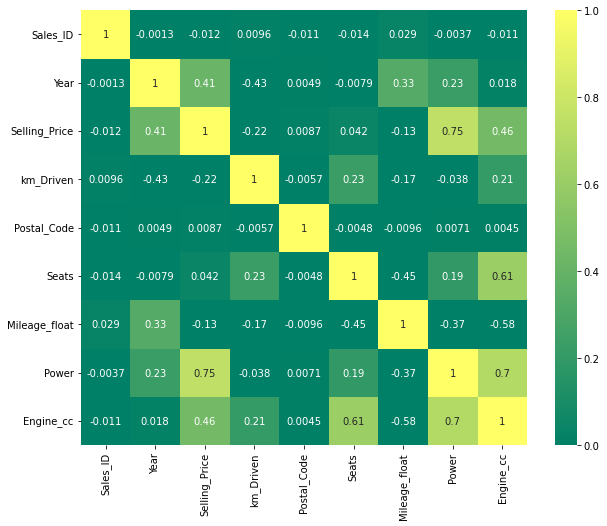

In [31]:
#Correlation for numerical fields
plt.figure(figsize=(10,8))
sns.heatmap(car_data.corr(), annot=True, cmap="summer", vmin=0, vmax=1)
plt.show()

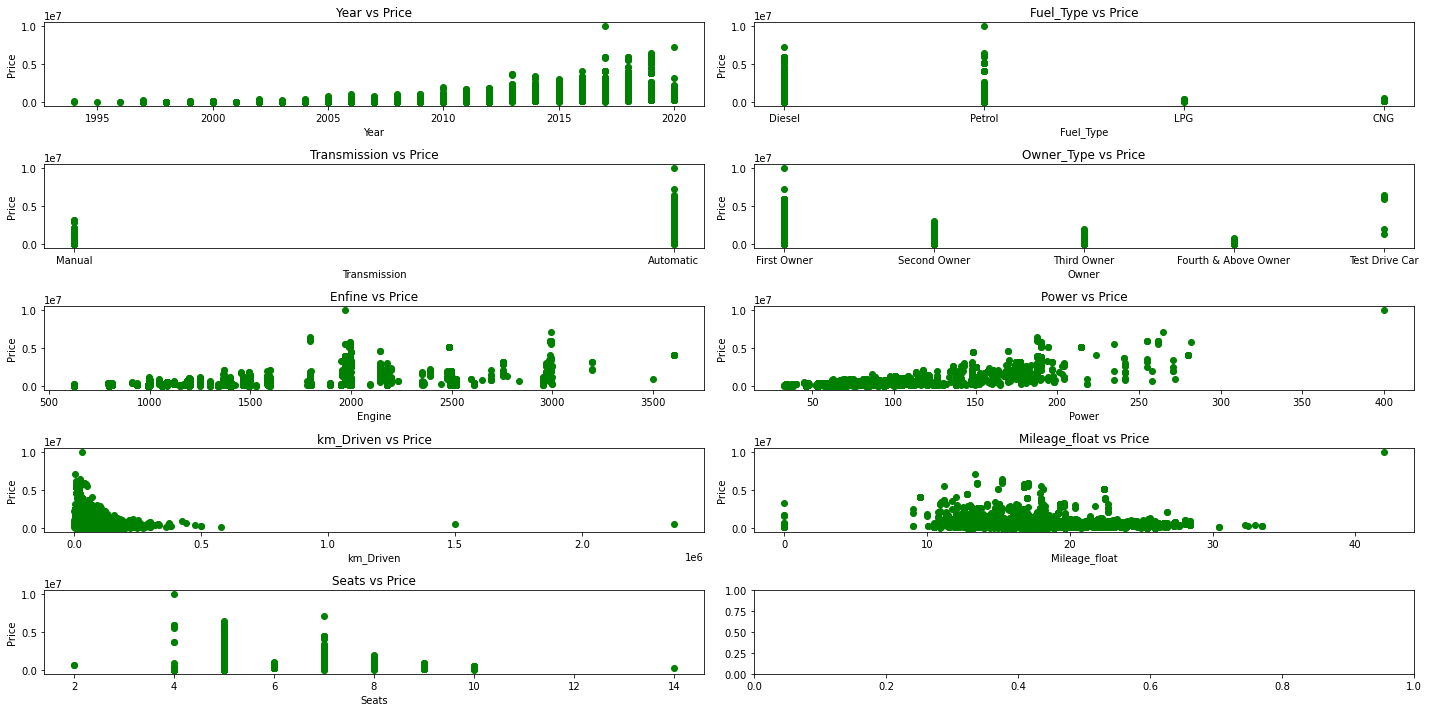

In [32]:
#### Selling Price vs different Paramters #####
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,10))
#year vs price
axes[0,0].set_title("Year vs Price")
axes[0,0].set_xlabel("Year")
axes[0,0].set_ylabel("Price")
axes[0,0].scatter(car_data.Year,car_data.Selling_Price,color='Green')


#fuel type vs price
axes[0,1].set_title("Fuel_Type vs Price")
axes[0,1].set_xlabel("Fuel_Type")
axes[0,1].set_ylabel("Price")
axes[0,1].scatter(car_data.Fuel,car_data.Selling_Price,color='Green')


#transmission vs price
axes[1,0].set_title("Transmission vs Price")
axes[1,0].set_xlabel("Transmission")
axes[1,0].set_ylabel("Price")
axes[1,0].scatter(car_data.Transmission,car_data.Selling_Price,color='Green')


#owner type vs price
axes[1,1].set_title("Owner_Type vs Price")
axes[1,1].set_xlabel("Owner")
axes[1,1].set_ylabel("Price")
axes[1,1].scatter(car_data.Owner,car_data.Selling_Price,color='Green')


axes[2,0].set_title("Enfine vs Price")
axes[2,0].set_xlabel("Engine")
axes[2,0].set_ylabel("Price")
axes[2,0].scatter(car_data.Engine_cc,car_data.Selling_Price,color='Green')


axes[2,1].set_title("Power vs Price")
axes[2,1].set_xlabel("Power")
axes[2,1].set_ylabel("Price")
axes[2,1].scatter(car_data.Power,car_data.Selling_Price,color='Green')

axes[3,0].set_title("km_Driven vs Price")
axes[3,0].set_xlabel("km_Driven")
axes[3,0].set_ylabel("Price")
axes[3,0].scatter(car_data.km_Driven,car_data.Selling_Price,color='Green')

axes[3,1].set_title("Mileage_float vs Price")
axes[3,1].set_xlabel("Mileage_float")
axes[3,1].set_ylabel("Price")
axes[3,1].scatter(car_data.Mileage_float,car_data.Selling_Price,color='Green')

axes[4,0].set_title("Seats vs Price")
axes[4,0].set_xlabel("Seats")
axes[4,0].set_ylabel("Price")
axes[4,0].scatter(car_data.Seats,car_data.Selling_Price,color='Green')


fig.tight_layout()

#### Selling price has Slightly Negatively Correlated with km_Driven and mileage
#### Selling price increases when no of seats,power and engine,Year(Positively Correlated) 

In [33]:
pd.options.display.float_format = '{:.2f}'.format
pd.pivot_table(data=car_data.query("Brand=='BMW'"),index=['Brand','km_Driven','Mileage_float'],values=['Selling_Price']).sort_values(by=['km_Driven','Mileage_float'],ascending=[True,True])

Selling_Price
Brand km_Driven Mileage_float               
BMW   5000      13.38             7200000.00
      7500      16.78             5412903.23
      8500      16.78             5500000.00
      10000     18.12             5200000.00
                22.48             4000000.00
      12000     18.12             2900000.00
      13663     22.69             3200000.00
      17100     22.48             3900000.00
      18000     19.62             3350000.00
      21000     16.78             5800000.00
      22000     17.09             5500000.00
      27000     17.05             2850000.00
                17.09             6000000.00
      28156     17.09             6000000.00
      29500     22.48             3790000.00
      30000     15.71             2500000.00
                17.09             5830000.00
                22.69             2150000.00
      39000     19.59             2950000.00
      40000     18.12             3200000.00
      42545     19.62             1075000.00
      44000     22.69             2600000.00
      50000     16.09             1800000.00
                17.05             1000000.00
      56000     11.20             3750000.00
      60000     11.00              830000.00
                14.49              750000.00
                16.07             1100000.00
                16.20             2000000.00
                16.73             1000000.00
                21.76             2950000.00
      72200     10.80              975000.00
      74000     18.88             1650000.00
      80000     16.07             1100000.00
                22.48              975000.00
      84925     16.07             1500000.00
      90000     14.49             2000000.00
      96000     19.62              925000.00
      102000    19.62             1100000.00
      110000    16.07              480000.00
      122000    18.48             1100000.00
      140000    18.88             1300000.00
      155000    16.07              900000.00

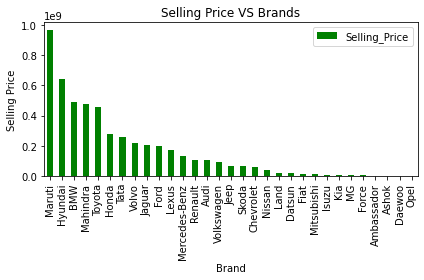

               Selling_Price
Brand                       
Maruti             968129371
Hyundai            643661446
BMW                490150000
Mahindra           477555971
Toyota             457387978
Honda              278165133
Tata               260172902
Volvo              219225000
Jaguar             206998000
Ford               202098985
Lexus              175100000
Mercedes-Benz      133404000
Renault            105476991
Audi               104487997
Volkswagen          90629997
Jeep                66637999
Skoda               63410996
Chevrolet           62989520
Nissan              37697996
Land                21650000
Datsun              20448997
Fiat                13004998
Mitsubishi          11445000
Isuzu                9710000
Kia                  6018000
MG                   5350000
Force                5325000
Ambassador            496000
Ashok                 300000
Daewoo                231000
Opel                   68000


In [34]:
#table = pd.pivot_table(data=car_data_vis.query("Sold=='Y'"), index=['Brand'], aggfunc={'SP_in_Lakhs':np.sum}).sort_values('SP_in_Lakhs',ascending=False)
table = pd.pivot_table(data=car_data, index=['Brand'], aggfunc={'Selling_Price':np.sum}).sort_values('Selling_Price',ascending=False)
table.plot(kind='bar',color='Green')
#table = car_data.query("Sold == 'Y'").groupby(['Brand'],as_index=False).agg({'Selling_Price':'sum'}).rename(columns={'Selling_Price':'Total_Selling_Price'}).sort_values('Total_Selling_Price',ascending=False)
plt.ylabel('Selling Price')
plt.title('Selling Price VS Brands')
plt.tight_layout()
plt.show()
print(table)

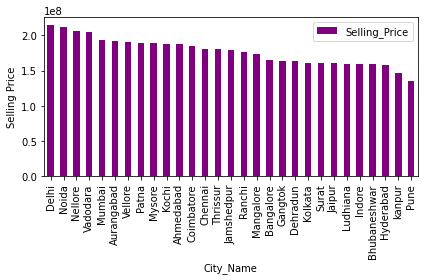

              Selling_Price
City_Name                  
Delhi             214853990
Noida             211556992
Nellore           206429984
Vadodara          204684988
Mumbai            193084984
Aurangabad        192231987
Vellore           190692988
Patna             189797583
Mysore            189105943
Kochi             188043948
Ahmedabad         187822698
Coimbatore        184818982
Chennai           181171991
Thrissur          180375992
Jamshedpur        179004995
Ranchi            176200987
Mangalore         173242139
Bangalore         164815343
Gangtok           164425989
Dehradun          163735253
Kolkata           161600988
Surat             160665990
Jaipur            160507492
Ludhiana          159501995
Indore            159424990
Bhubaneshwar      159331492
Hyderabad         158189991
kanpur            146371497
Pune              135735086


In [35]:
#table = pd.pivot_table(data=car_data_vis.query("Sold=='Y'"),index=['City_Name'],aggfunc={'SP_in_Lakhs':np.sum}).sort_values('SP_in_Lakhs',ascending=False)
table = pd.pivot_table(data=car_data,index=['City_Name'],aggfunc={'Selling_Price':np.sum}).sort_values('Selling_Price',ascending=False)
table.plot(kind='bar',color='Purple')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()
print(table)

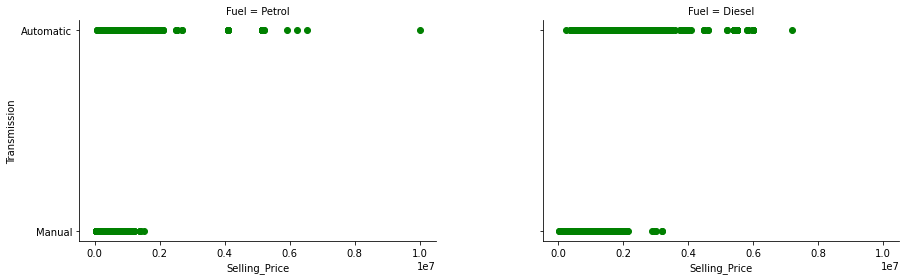

In [36]:
#### verifying above metrics:
#g=sns.FacetGrid(col='Fuel',aspect=1.2, height=4,row='Transmission',data=car_data_vis.query("Sold=='Y'"),col_order= ['Petrol','Diesel']).map(plt.hist,'SP_in_Lakhs',bins=10,color = 'Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
g=sns.FacetGrid(col='Fuel', aspect=1.6, height=4, col_wrap=5, data=car_data,col_order= ['Petrol','Diesel']).map(plt.scatter,\
                'Selling_Price', 'Transmission',color='Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
#g=sns.FacetGrid(col='Fuel',aspect=1.2, height=4,row='Transmission',data=car_data_vis,col_order= ['Petrol','Diesel']).map(plt.hist,'SP_in_Lakhs',bins=15,color = 'Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

#### Selling Price is more for Diesel Cars with Automatic Transmission

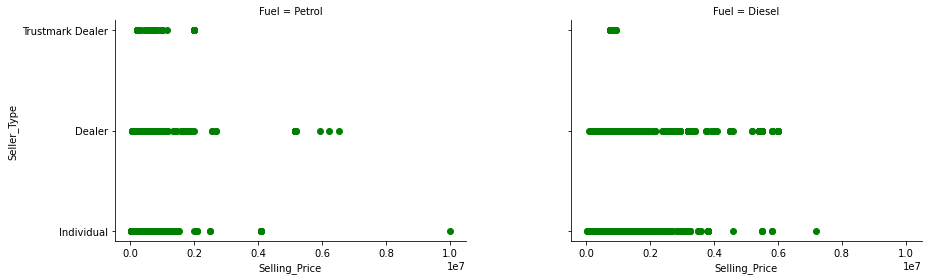

In [37]:
#### verifying above metrics:

g=sns.FacetGrid(col='Fuel', aspect=1.6, height=4, col_wrap=5, data=car_data,col_order= ['Petrol','Diesel']).map(plt.scatter,\
                'Selling_Price', 'Seller_Type',color='Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
#g=sns.FacetGrid(col='Fuel',aspect=1.2, height=4,row='Transmission',data=car_data_vis,col_order= ['Petrol','Diesel']).map(plt.hist,'SP_in_Lakhs',bins=15,color = 'Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()



#### Diesel Cars are selling more and with dealer type prices are more for Diesel Cars...

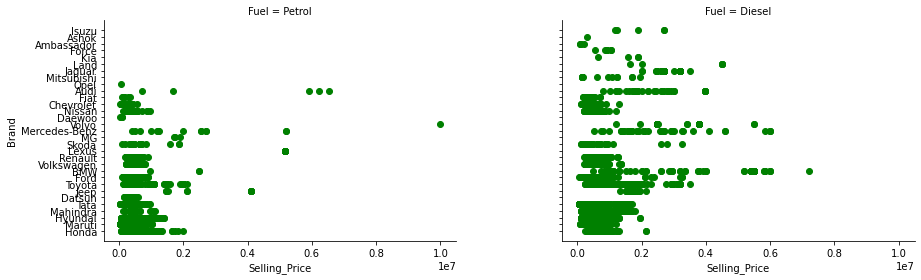

In [38]:
#### verifying above metrics:
#g=sns.FacetGrid(col='Fuel',aspect=1.2, height=4,row='Brand',data=car_data_vis.query("Sold=='Y'"),col_order= ['Petrol','Diesel']).map(plt.hist,'SP_in_Lakhs',bins=10,color = 'Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
g=sns.FacetGrid(col='Fuel', aspect=1.6, height=4, col_wrap=5, data=car_data,col_order= ['Petrol','Diesel']).map(plt.scatter,\
                'Selling_Price', 'Brand',color='Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

#### Bards with Diesel Cars have higher selling price...####

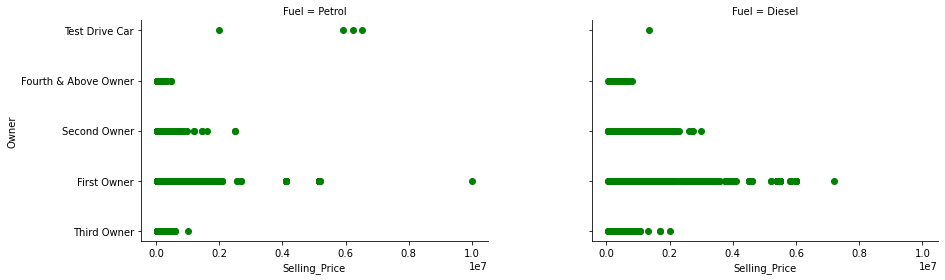

In [39]:
#### verifying above metrics:
#g=sns.FacetGrid(col='Fuel',aspect=1.2, height=4,row='Owner',data=car_data_vis.query("Sold=='Y'"),col_order= ['Petrol','Diesel']).map(plt.hist,'SP_in_Lakhs',bins=10,color = 'Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
g=sns.FacetGrid(col='Fuel', aspect=1.6, height=4, col_wrap=5, data=car_data,col_order= ['Petrol','Diesel']).map(plt.scatter,\
                'Selling_Price', 'Owner',color='Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

#### First owners have higher demand in both Petrol and Diesel Cars

In [40]:
#### top barands by average selling price:
#pd.pivot_table(car_data_vis,index=['Brand'],aggfunc={'SP_in_Lakhs':np.mean}).sort_values('SP_in_Lakhs',ascending=False).head(10)
Top_Brands = car_data.query("Sold=='Y'").groupby(['Brand'],as_index=False).agg({'Selling_Price':np.mean}).rename(columns={'Selling_Price':'Avg_SP_in_Lakhs'}).sort_values('Avg_SP_in_Lakhs',ascending=False).head(20).reset_index(drop=True)
Top_Brands['Avg_SP_in_Lakhs'] = Top_Brands['Avg_SP_in_Lakhs']/100000
Top_Brands

,Brand,Avg_SP_in_Lakhs
0,Lexus,51.50
1,BMW,46.07
2,Land,45.00
3,Volvo,35.47
4,Jaguar,29.18
5,Mercedes-Benz,27.67
6,Audi,26.38
7,Jeep,25.52
8,MG,18.25
9,Kia,12.71


In [41]:
Top_Brands["Avg_SP_in_Lakhs"] = Top_Brands["Avg_SP_in_Lakhs"].round(2)

[(19, 4.21), (18, 4.63), (17, 4.92), (16, 5.58), (15, 5.62), (14, 5.83), (13, 7.48), (12, 8.88), (11, 9.1), (10, 10.86), (9, 12.72), (8, 18.25), (7, 25.52), (6, 26.38), (5, 27.67), (4, 29.18), (3, 35.47), (2, 45.0), (1, 46.07), (0, 51.5)]


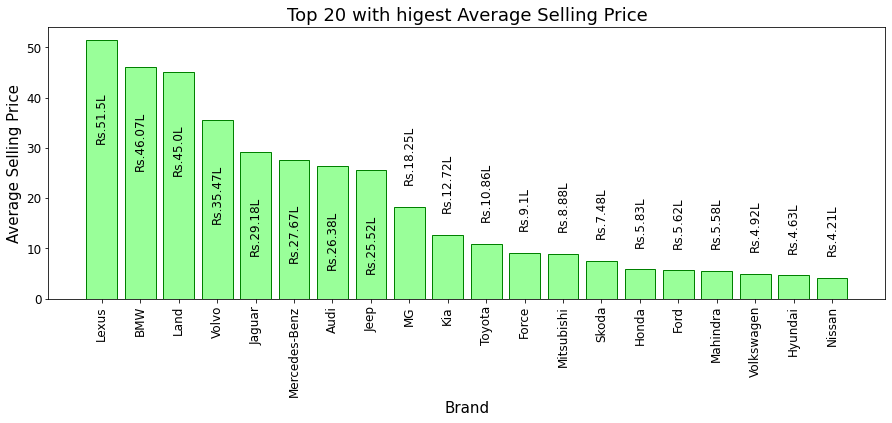

In [42]:
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize = (15,5)) 
plt.bar(Top_Brands["Brand"], Top_Brands["Avg_SP_in_Lakhs"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.title("Top 20 with higest Average Selling Price", fontsize=18)
plt.xlabel("Brand",fontsize=15) 
plt.ylabel("Average Selling Price",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
tuple=sorted(Top_Brands["Avg_SP_in_Lakhs"].items(),key=lambda x:x[1])
print(list(tuple))
for k,v in Top_Brands["Avg_SP_in_Lakhs"].items():
    if v>25:
        plt.text(k,v-20,'Rs.'+ str(v)+'L', fontsize=12,rotation=90,color='k', horizontalalignment='center')
    else:
        plt.text(k,v+5,'Rs.'+ str(v)+'L', fontsize=12,rotation=90,color='k', horizontalalignment='center')

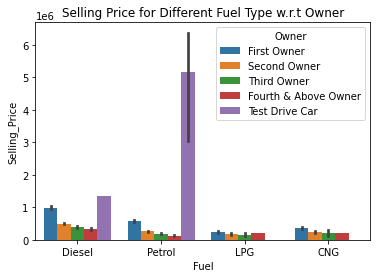

In [43]:
sns.barplot(x=car_data['Fuel'],y=car_data['Selling_Price'],hue=car_data['Owner'],data=car_data)
plt.title('Selling Price for Different Fuel Type w.r.t Owner')
plt.show()

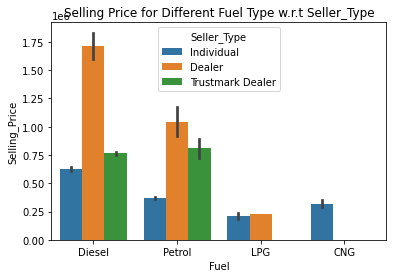

In [44]:
sns.barplot(x=car_data['Fuel'],y=car_data['Selling_Price'],hue=car_data['Seller_Type'],data=car_data)
plt.title('Selling Price for Different Fuel Type w.r.t Seller_Type')
plt.show()

In [45]:
##### PCA (Principle component analysis) ####
#car_data.info()
car_data.drop(['Max_Power','Mileage','Engine','Engine_cc_bin','Sales_ID','Postal_Code','Name','City_Code','State_Code',\
'Region','Region_Code','City_Name','State_Name'],axis=1,inplace=True)

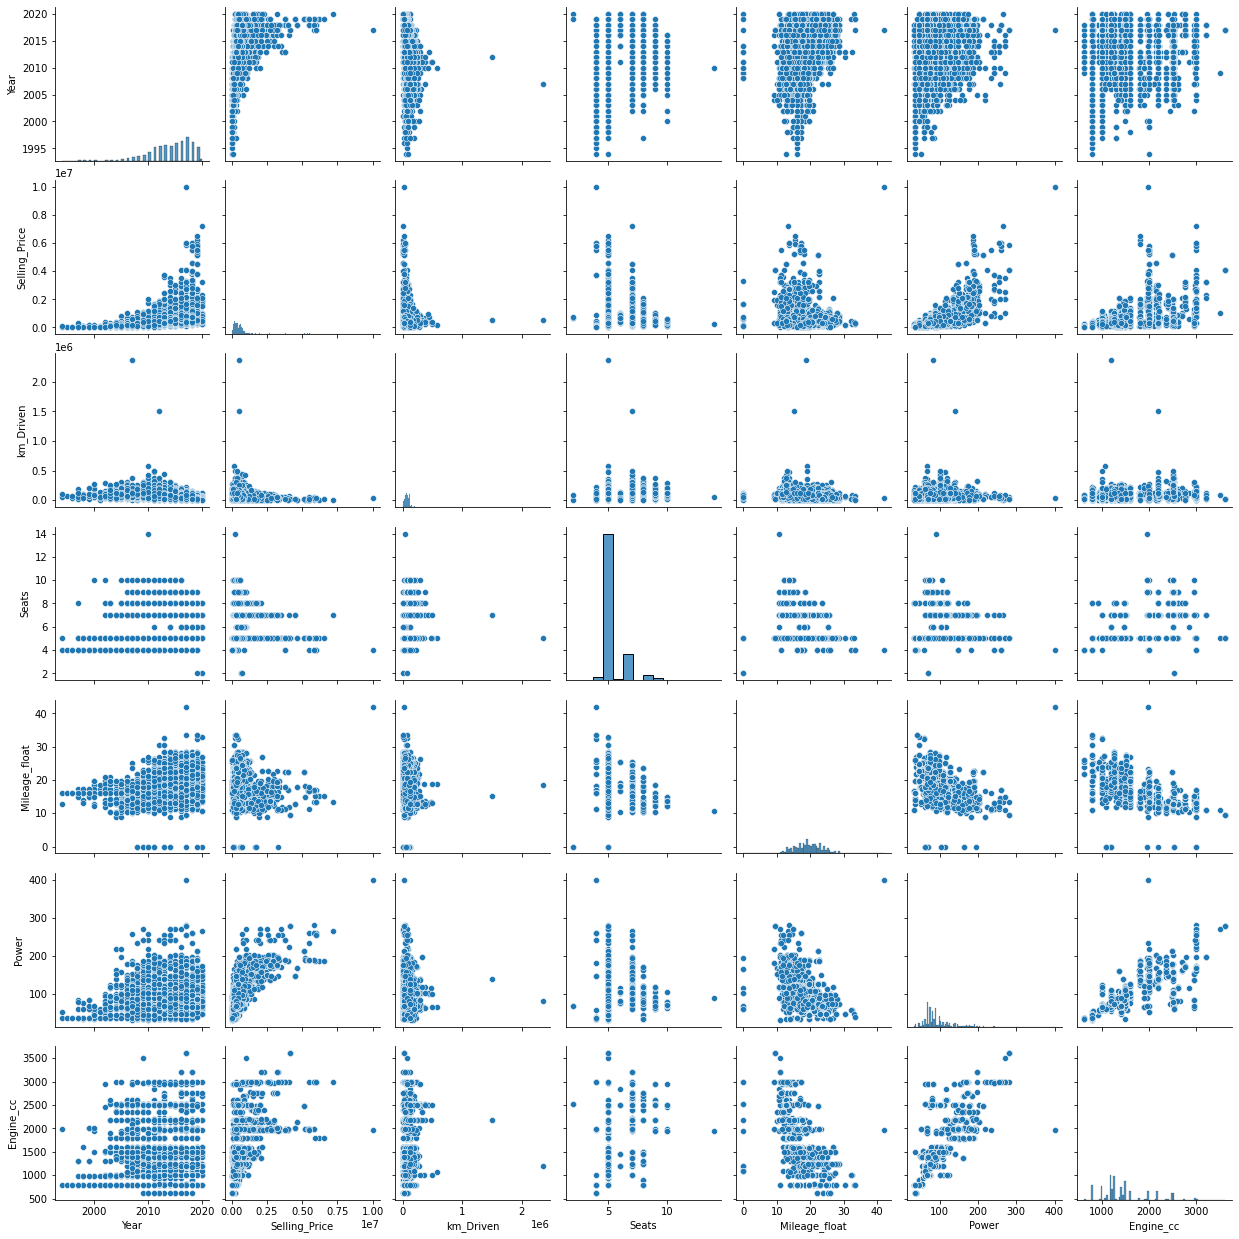

In [46]:
sns.pairplot(car_data)

In [47]:
pca_numerical = car_data.select_dtypes(exclude=object)

In [48]:
#### Before Standardization...
pca_numerical.head()

,Year,Selling_Price,km_Driven,Seats,Mileage_float,Power,Engine_cc
0,2014,450000,145500,5,23.40,74.00,1248
1,2014,370000,120000,5,21.14,103.52,1498
2,2006,158000,140000,5,17.70,78.00,1497
3,2010,225000,127000,5,23.00,90.00,1396
4,2007,130000,120000,5,16.10,88.20,1298


In [49]:
### Standardization
sc =  StandardScaler()
scaler = sc.fit_transform(pca_numerical)
### After standarization...
pca_scaled = pd.DataFrame(scaler,columns=pca_numerical.columns)
pca_scaled.head(5)

,Year,Selling_Price,km_Driven,Seats,Mileage_float,Power,Engine_cc
0,0.00,-0.25,1.34,-0.43,0.99,-0.49,-0.42
1,0.00,-0.34,0.89,-0.43,0.43,0.33,0.08
2,-2.07,-0.60,1.25,-0.43,-0.43,-0.38,0.08
3,-1.03,-0.52,1.02,-0.43,0.89,-0.04,-0.12
4,-1.81,-0.64,0.89,-0.43,-0.82,-0.09,-0.32


In [50]:
pca_object = car_data.select_dtypes(include=object)

In [51]:
pca = PCA(svd_solver='randomized', random_state=42)

In [52]:
### fitting our scaled data..
pca.fit(pca_scaled)

PCA(random_state=42, svd_solver='randomized')

In [53]:
# PCA components created - with eigen vectors

pca.components_

array([[ 0.06893921,  0.39154752,  0.07001876,  0.35591033, -0.39149448,
         0.50417592,  0.5503652 ],
       [-0.56645979, -0.42595537,  0.50166555,  0.27711543, -0.32895448,
        -0.22462616,  0.10274278],
       [-0.48120245,  0.29109885,  0.20304974, -0.71996798, -0.09488313,
         0.33038902, -0.07721959],
       [ 0.26360506,  0.12357772,  0.76543161,  0.04332961,  0.56104825,
         0.07897514,  0.08040957],
       [ 0.60100459, -0.16929044,  0.31475532, -0.3022219 , -0.61658034,
        -0.04961148, -0.19259446],
       [-0.09956319,  0.6979187 ,  0.12965461,  0.29000606, -0.18520186,
        -0.37265889, -0.47844378],
       [ 0.04698861,  0.22246977, -0.02081039, -0.31758768, -0.01649323,
        -0.66228379,  0.63883677]])

In [54]:
# Variance Ratio

pca.explained_variance_ratio_

array([0.40039825, 0.28153929, 0.11881319, 0.1029037 , 0.04311343,
       0.03400528, 0.01922686])

In [55]:
### for entire set
pca.explained_variance_ratio_.sum()

0.9999999999999991

Text(0, 0.5, 'Variance Ratio')

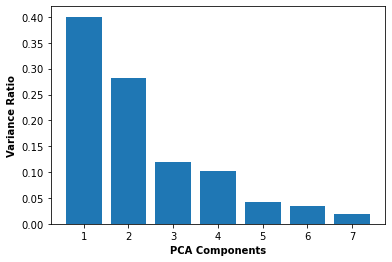

In [56]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

Text(0, 0.5, 'Cumulative Explained Variance')

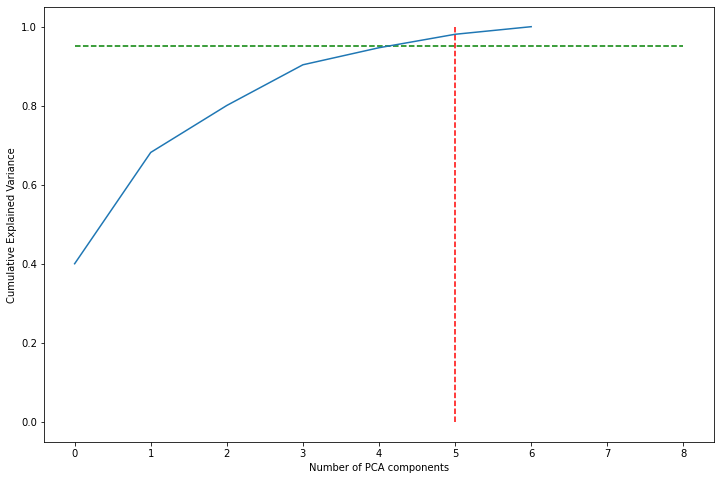

In [57]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [58]:
# Checking which attributes are well explained by the pca components

org_col = list(pca_scaled.columns)
#attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2],'PC_4':pca.components_[3],'PC_5':pca.components_[4],'PC_6':pca.components_[5],'PC_7':pca.components_[6]})
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2],'PC_4':pca.components_[3],'PC_5':pca.components_[4]})
attributes_pca

,Attribute,PC_1,PC_2,PC_3,PC_4,PC_5
0,Year,0.07,-0.57,-0.48,0.26,0.60
1,Selling_Price,0.39,-0.43,0.29,0.12,-0.17
2,km_Driven,0.07,0.50,0.20,0.77,0.31
3,Seats,0.36,0.28,-0.72,0.04,-0.30
4,Mileage_float,-0.39,-0.33,-0.09,0.56,-0.62
5,Power,0.50,-0.22,0.33,0.08,-0.05
6,Engine_cc,0.55,0.10,-0.08,0.08,-0.19


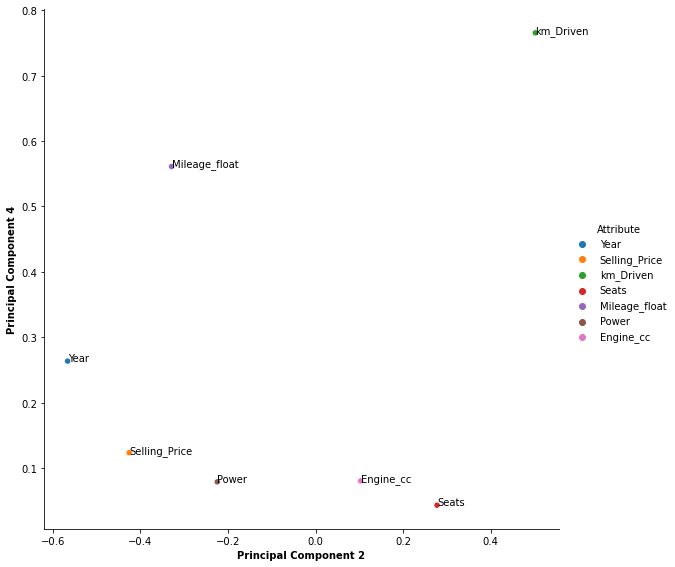

In [59]:
# Plotting the above dataframe for better visualization with PC1 and PC2(Sample)

sns.pairplot(data=attributes_pca, x_vars=["PC_2"], y_vars=["PC_4"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 2",fontweight = 'bold')
plt.ylabel("Principal Component 4",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_2[i],attributes_pca.PC_4[i]))

#### Inference:
#### Selling_Price,Seats are well explained by PC_1 and PC_7
#### km_Driven is well explained by PC_2 and PC_4
#### Mileage is well explained by PC_6
#### Power is well explained by PC_1 and PC_3
#### Engine is well explained by PC_1 and PC_7

In [60]:
# Building the dataframe

inc_pca = PCA(n_components=5)

In [61]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(pca_scaled)
df_inc_pca[:5]

array([[-1.0206015 ,  0.39924254,  0.28807657,  1.46130027,  0.09514812],
       [-0.18187687,  0.26553636,  0.45594363,  0.89639823,  0.17918897],
       [-0.42936897,  2.16672039,  1.29316059,  0.05318246, -0.3490061 ],
       [-0.79694143,  0.90233802,  0.77423852,  0.90821144, -0.60048481],
       [-0.36795764,  1.88381418,  1.24946916, -0.38405106,  0.0078708 ]])

In [62]:
#pca_df_7D = pd.DataFrame(data=df_inc_pca, columns = ['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7'])
pca_df_5D = pd.DataFrame(data=df_inc_pca, columns = ['PC_1','PC_2','PC_3','PC_4','PC_5'])
#print(pca_df_7D)
print(pca_df_5D)
reconstructed_data = inc_pca.inverse_transform(df_inc_pca)
print(reconstructed_data)

      PC_1  PC_2  PC_3  PC_4  PC_5
0    -1.02  0.40  0.29  1.46  0.10
1    -0.18  0.27  0.46  0.90  0.18
2    -0.43  2.17  1.29  0.05 -0.35
3    -0.80  0.90  0.77  0.91 -0.60
4    -0.37  1.88  1.25 -0.38  0.01
...    ...   ...   ...   ...   ...
7901 -0.60  0.63  0.44  0.23  0.53
7902  0.09  1.72  1.40 -0.22 -0.21
7903 -0.78  1.28  0.89  0.20 -0.18
7904 -1.18 -0.39 -0.14 -0.22 -0.77
7905 -1.18 -0.39 -0.14 -0.22 -0.77

[7906 rows x 5 columns]
[[ 0.00725315 -0.32133825  1.33579265 ...  1.00208713 -0.39837973
  -0.44375189]
 [-0.03836681  0.02884445  0.95558711 ...  0.33303131  0.06119776
  -0.07045634]
 [-2.07496747 -0.64895143  1.25033703 ... -0.4223277  -0.25441872
  -0.04205917]
 ...
 [-1.26444901 -0.53409249  0.85956635 ...  0.02269727 -0.36017261
  -0.31448467]
 [-0.31240574 -0.22923406 -0.71696938 ...  0.95697108 -0.52898252
  -0.54527265]
 [-0.31240574 -0.22923406 -0.71696938 ...  0.95697108 -0.52898252
  -0.54527265]]


In [63]:
loss = np.sum((reconstructed_data - pca_scaled) ** 2, axis=1).mean()
loss

0.37262497201622613

In [64]:
evr = pca.explained_variance_ratio_.sum()
print(evr)

0.9999999999999991


In [65]:
# Creating new dataframe with Principal components

#df_pca = pd.DataFrame(df_inc_pca, columns=['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7'])
df_pca = pd.DataFrame(df_inc_pca, columns=['PC_1','PC_2','PC_3','PC_4','PC_5'])
df_pca_final = pd.concat([pca_object, df_pca], axis=1)
df_pca_final.head()

,Fuel,Seller_Type,Transmission,Owner,Sold,Brand,PC_1,PC_2,PC_3,PC_4,PC_5
0,Diesel,Individual,Manual,First Owner,Y,Maruti,-1.02,0.40,0.29,1.46,0.10
1,Diesel,Individual,Manual,Second Owner,Y,Skoda,-0.18,0.27,0.46,0.90,0.18
2,Petrol,Individual,Manual,Third Owner,Y,Honda,-0.43,2.17,1.29,0.05,-0.35
3,Diesel,Individual,Manual,First Owner,Y,Hyundai,-0.80,0.90,0.77,0.91,-0.60
4,Petrol,Individual,Manual,First Owner,Y,Maruti,-0.37,1.88,1.25,-0.38,0.01


(5.5, -0.5)

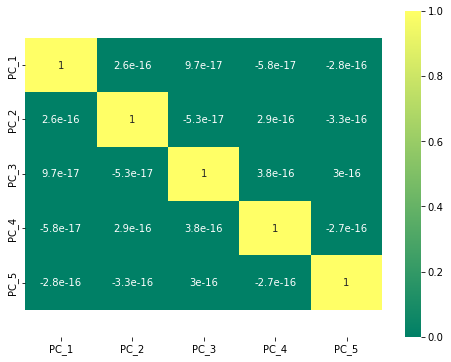

In [66]:
# Plotting Heatmap to check is there still dependency in the dataset.
#### correlation is almost 0...
plt.figure(figsize = (8,6))        
ax = sns.heatmap(df_pca_final.corr(),annot = True,cmap='summer')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

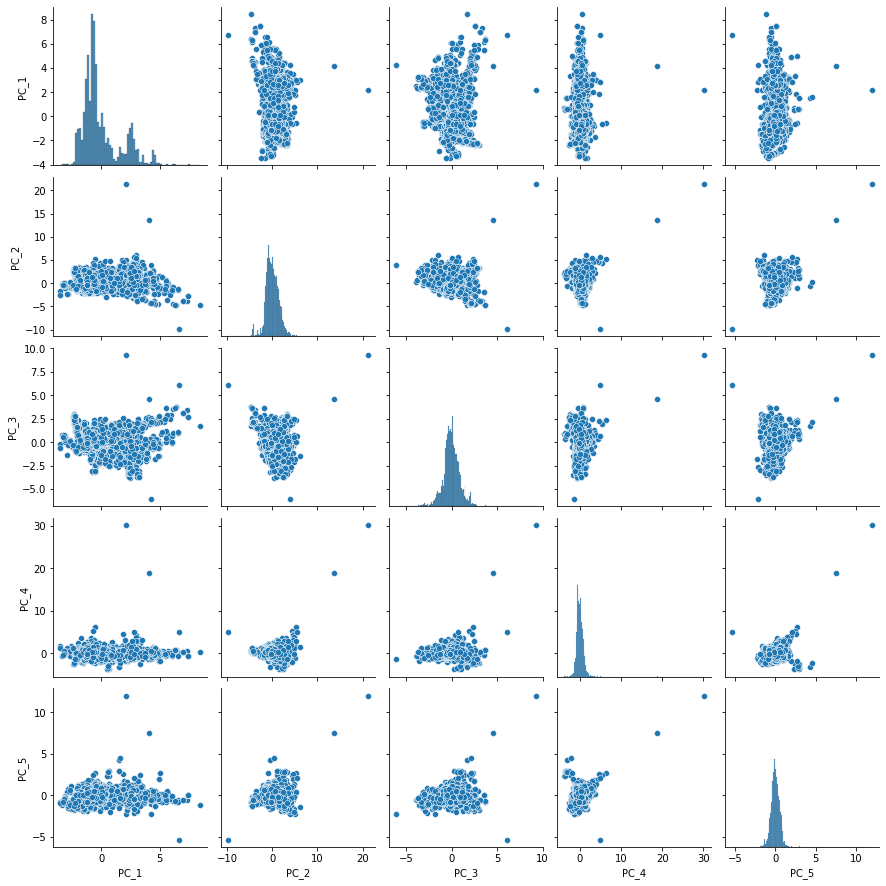

In [67]:
sns.pairplot(df_pca_final)

<AxesSubplot:xlabel='PC_1', ylabel='PC_3'>

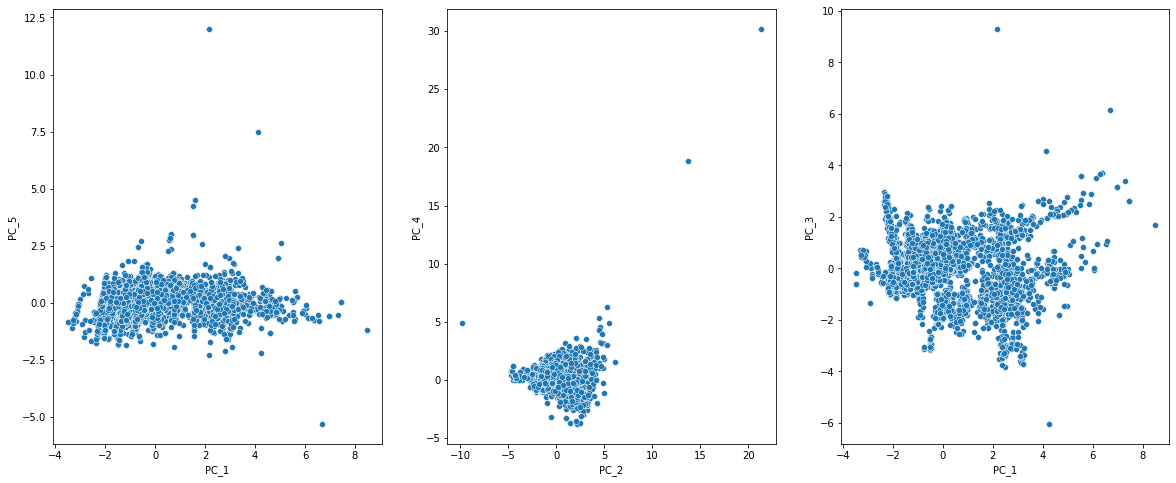

In [68]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_5')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_2', y='PC_4')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')

Text(0.5, 0, 'PC Components')

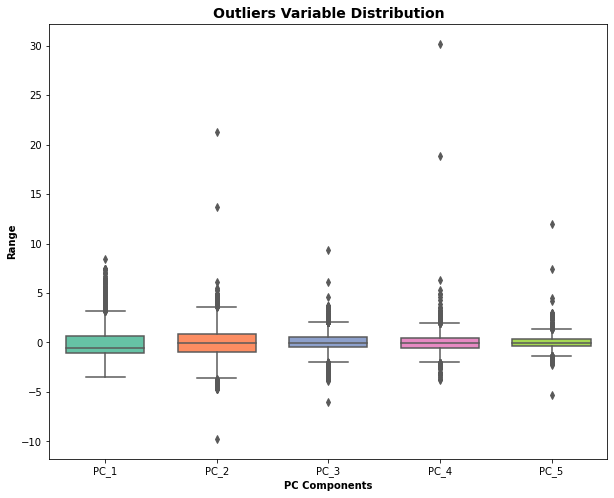

In [69]:
# Outlier Analysis (before removal of outliers)

outliers = ['PC_1','PC_2','PC_3','PC_4','PC_5']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [70]:
# Statstical Outlier treatment for PC_1

Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

# Statstical Outlier treatment for PC_2

Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

# Statstical Outlier treatment for PC_3

Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

# Statstical Outlier treatment for PC_4

Q1 = df_pca_final.PC_4.quantile(0.05)
Q3 = df_pca_final.PC_4.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_4 >= Q1) & (df_pca_final.PC_4 <= Q3)]

# Statstical Outlier treatment for PC_5

Q1 = df_pca_final.PC_5.quantile(0.05)
Q3 = df_pca_final.PC_5.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_5 >= Q1) & (df_pca_final.PC_5 <= Q3)]

'''
# Statstical Outlier treatment for PC_6

Q1 = df_pca_final.PC_6.quantile(0.01)
Q3 = df_pca_final.PC_6.quantile(0.99)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_6 >= Q1) & (df_pca_final.PC_6 <= Q3)]

# Statstical Outlier treatment for PC_7

Q1 = df_pca_final.PC_7.quantile(0.01)
Q3 = df_pca_final.PC_7.quantile(0.99)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_7 >= Q1) & (df_pca_final.PC_7 <= Q3)]

# Statstical Outlier treatment for PC_8

#Q1 = df_pca_final.PC_8.quantile(0.01)
#Q3 = df_pca_final.PC_8.quantile(0.99)
#IQR = Q3 - Q1
#df_pca_final = df_pca_final[(df_pca_final.PC_8 >= Q1) & (df_pca_final.PC_8 <= Q3)]
'''

'\n# Statstical Outlier treatment for PC_6\n\nQ1 = df_pca_final.PC_6.quantile(0.01)\nQ3 = df_pca_final.PC_6.quantile(0.99)\nIQR = Q3 - Q1\ndf_pca_final = df_pca_final[(df_pca_final.PC_6 >= Q1) & (df_pca_final.PC_6 <= Q3)]\n\n# Statstical Outlier treatment for PC_7\n\nQ1 = df_pca_final.PC_7.quantile(0.01)\nQ3 = df_pca_final.PC_7.quantile(0.99)\nIQR = Q3 - Q1\ndf_pca_final = df_pca_final[(df_pca_final.PC_7 >= Q1) & (df_pca_final.PC_7 <= Q3)]\n\n# Statstical Outlier treatment for PC_8\n\n#Q1 = df_pca_final.PC_8.quantile(0.01)\n#Q3 = df_pca_final.PC_8.quantile(0.99)\n#IQR = Q3 - Q1\n#df_pca_final = df_pca_final[(df_pca_final.PC_8 >= Q1) & (df_pca_final.PC_8 <= Q3)]\n'

In [71]:
#### out of 7906 we have for all pca components majority of data(between 5 to 95 percent) distribute in 4669 rows...
df_pca_final.shape 

(4669, 11)

Text(0.5, 0, 'PC Components')

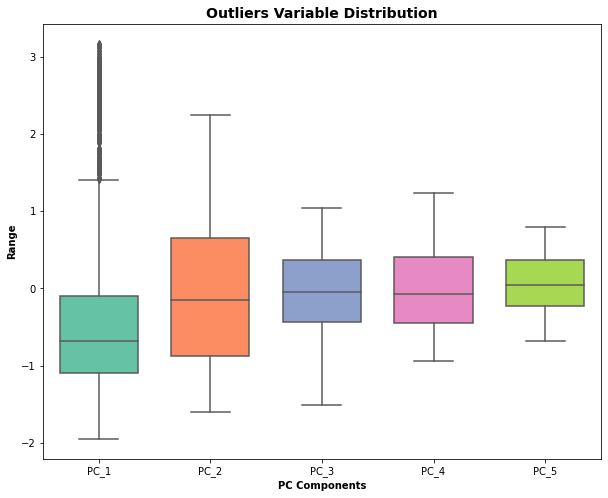

In [72]:
# Outlier Analysis (After removal of outliers)

#outliers = ['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7','PC_8']
outliers = ['PC_1','PC_2','PC_3','PC_4','PC_5']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [73]:
df_pca_final[outliers]

,PC_1,PC_2,PC_3,PC_4,PC_5
1,-0.18,0.27,0.46,0.90,0.18
3,-0.80,0.90,0.77,0.91,-0.60
5,-0.72,-0.72,-0.29,-0.13,0.51
9,-0.72,1.23,0.41,1.21,0.59
10,0.05,-0.13,0.42,-0.08,0.20
...,...,...,...,...,...
7897,-1.18,-0.34,-0.31,0.31,0.76
7899,-1.18,0.16,0.08,-0.60,0.24
7900,-0.64,-0.18,0.20,0.52,-0.22
7901,-0.60,0.63,0.44,0.23,0.53


In [74]:
df_pca_final[df_pca_final.PC_1 <= df_pca_final.PC_1.quantile(0.99)]

,Fuel,Seller_Type,Transmission,Owner,Sold,Brand,PC_1,PC_2,PC_3,PC_4,PC_5
1,Diesel,Individual,Manual,Second Owner,Y,Skoda,-0.18,0.27,0.46,0.90,0.18
3,Diesel,Individual,Manual,First Owner,Y,Hyundai,-0.80,0.90,0.77,0.91,-0.60
5,Petrol,Individual,Manual,First Owner,Y,Hyundai,-0.72,-0.72,-0.29,-0.13,0.51
9,Diesel,Individual,Manual,First Owner,Y,Ford,-0.72,1.23,0.41,1.21,0.59
10,Diesel,Individual,Manual,Second Owner,Y,Renault,0.05,-0.13,0.42,-0.08,0.20
...,...,...,...,...,...,...,...,...,...,...,...
7897,Petrol,Individual,Manual,First Owner,N,Maruti,-1.18,-0.34,-0.31,0.31,0.76
7899,Petrol,Individual,Manual,Second Owner,N,Maruti,-1.18,0.16,0.08,-0.60,0.24
7900,Diesel,Individual,Manual,Second Owner,N,Hyundai,-0.64,-0.18,0.20,0.52,-0.22
7901,Petrol,Individual,Manual,First Owner,N,Hyundai,-0.60,0.63,0.44,0.23,0.53


In [75]:
df_pca_final = df_pca_final.reset_index(drop=True)

In [76]:
df_pca_final.head(5)

,Fuel,Seller_Type,Transmission,Owner,Sold,Brand,PC_1,PC_2,PC_3,PC_4,PC_5
0,Diesel,Individual,Manual,Second Owner,Y,Skoda,-0.18,0.27,0.46,0.90,0.18
1,Diesel,Individual,Manual,First Owner,Y,Hyundai,-0.80,0.90,0.77,0.91,-0.60
2,Petrol,Individual,Manual,First Owner,Y,Hyundai,-0.72,-0.72,-0.29,-0.13,0.51
3,Diesel,Individual,Manual,First Owner,Y,Ford,-0.72,1.23,0.41,1.21,0.59
4,Diesel,Individual,Manual,Second Owner,Y,Renault,0.05,-0.13,0.42,-0.08,0.20


In [77]:
car_data.columns

Index(['Year', 'Selling_Price', 'km_Driven', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner', 'Seats', 'Sold', 'Mileage_float', 'Power',
       'Engine_cc', 'Brand'],
      dtype='object')

In [78]:
##### Selling Price Vs other parameters:

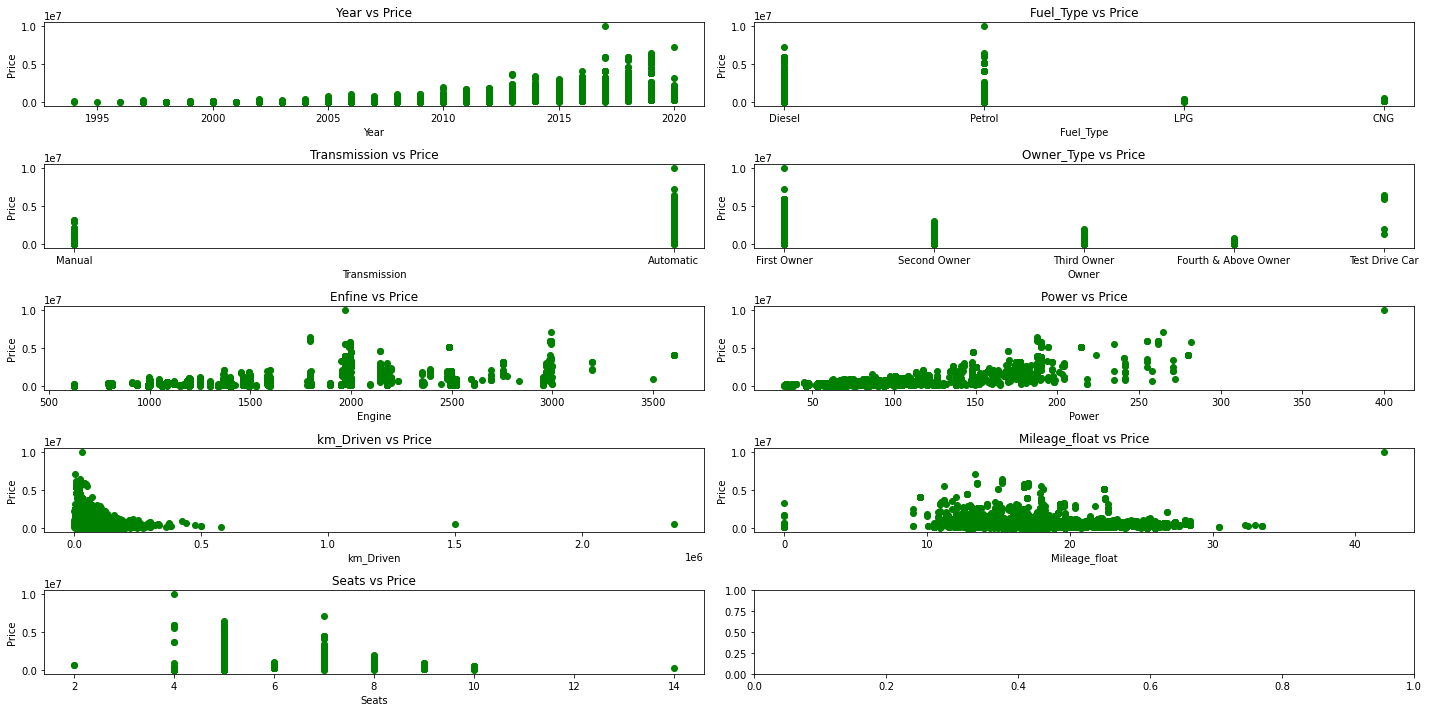

In [79]:
#### Selling Price vs different Paramters #####
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,10))
#year vs price
axes[0,0].set_title("Year vs Price")
axes[0,0].set_xlabel("Year")
axes[0,0].set_ylabel("Price")
axes[0,0].scatter(car_data.Year,car_data.Selling_Price,color='Green')


#fuel type vs price
axes[0,1].set_title("Fuel_Type vs Price")
axes[0,1].set_xlabel("Fuel_Type")
axes[0,1].set_ylabel("Price")
axes[0,1].scatter(car_data.Fuel,car_data.Selling_Price,color='Green')


#transmission vs price
axes[1,0].set_title("Transmission vs Price")
axes[1,0].set_xlabel("Transmission")
axes[1,0].set_ylabel("Price")
axes[1,0].scatter(car_data.Transmission,car_data.Selling_Price,color='Green')


#owner type vs price
axes[1,1].set_title("Owner_Type vs Price")
axes[1,1].set_xlabel("Owner")
axes[1,1].set_ylabel("Price")
axes[1,1].scatter(car_data.Owner,car_data.Selling_Price,color='Green')


axes[2,0].set_title("Enfine vs Price")
axes[2,0].set_xlabel("Engine")
axes[2,0].set_ylabel("Price")
axes[2,0].scatter(car_data.Engine_cc,car_data.Selling_Price,color='Green')


axes[2,1].set_title("Power vs Price")
axes[2,1].set_xlabel("Power")
axes[2,1].set_ylabel("Price")
axes[2,1].scatter(car_data.Power,car_data.Selling_Price,color='Green')

axes[3,0].set_title("km_Driven vs Price")
axes[3,0].set_xlabel("km_Driven")
axes[3,0].set_ylabel("Price")
axes[3,0].scatter(car_data.km_Driven,car_data.Selling_Price,color='Green')

axes[3,1].set_title("Mileage_float vs Price")
axes[3,1].set_xlabel("Mileage_float")
axes[3,1].set_ylabel("Price")
axes[3,1].scatter(car_data.Mileage_float,car_data.Selling_Price,color='Green')

axes[4,0].set_title("Seats vs Price")
axes[4,0].set_xlabel("Seats")
axes[4,0].set_ylabel("Price")
axes[4,0].scatter(car_data.Seats,car_data.Selling_Price,color='Green')


fig.tight_layout()

In [80]:
car_data.Selling_Price.describe()

count       7906.00
mean      649813.72
std       813582.75
min        29999.00
25%       270000.00
50%       450000.00
75%       690000.00
max     10000000.00
Name: Selling_Price, dtype: float64

In [81]:
car_data.query("Selling_Price==10000000")

,Year,Selling_Price,km_Driven,Fuel,Seller_Type,Transmission,Owner,Seats,Sold,Mileage_float,Power,Engine_cc,Brand
164,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,4,Y,42.00,400.00,1969,Volvo


In [82]:
car_data.shape

(7906, 13)

In [83]:
#drop the above row with Selling_Price==10000000
#df1_map.drop(df1_map[df1_map['Seats']==0].index,axis=0,inplace=True)
car_data.drop(car_data.query("Selling_Price==10000000").index,axis=0,inplace=True)

In [84]:
car_data.shape

(7905, 13)

In [85]:
car_data.isin([0]).sum()

Year              0
Selling_Price     0
km_Driven         0
Fuel              0
Seller_Type       0
Transmission      0
Owner             0
Seats             0
Sold              0
Mileage_float    17
Power             0
Engine_cc         0
Brand             0
dtype: int64

In [86]:
Zero_Mileage_Brands = car_data.query("Mileage_float==0")['Brand'].unique()

In [87]:
car_data.query("Mileage_float==0")['Brand']

625              Tata
758           Hyundai
1600          Hyundai
1626    Mercedes-Benz
2073             Land
2291          Hyundai
2637          Hyundai
4395    Mercedes-Benz
5131          Hyundai
5676       Volkswagen
5679       Volkswagen
5733         Mahindra
6353          Hyundai
6446         Mahindra
6636          Hyundai
6809          Hyundai
7136    Mercedes-Benz
Name: Brand, dtype: object

In [88]:
Zero_Mileage_Brands

array(['Tata', 'Hyundai', 'Mercedes-Benz', 'Land', 'Volkswagen',
       'Mahindra'], dtype=object)

In [89]:
Brands_Median_Mileage = car_data.groupby(['Brand'],as_index=False).agg({'Mileage_float':np.median})

In [90]:
Brands_Median_Mileage.columns

Index(['Brand', 'Mileage_float'], dtype='object')

In [91]:
df = Brands_Median_Mileage[Brands_Median_Mileage['Brand'].isin(Zero_Mileage_Brands)]

In [92]:
df

,Brand,Mileage_float
11,Hyundai,19.81
16,Land,12.83
19,Mahindra,15.96
21,Mercedes-Benz,14.48
27,Tata,18.80
29,Volkswagen,20.34


In [93]:
s = car_data.query("Mileage_float==0").Brand.replace(df.set_index('Brand')['Mileage_float'])
#car_data['Mileage_float'] = s

In [94]:
s

625    18.80
758    19.81
1600   19.81
1626   14.48
2073   12.83
2291   19.81
2637   19.81
4395   14.48
5131   19.81
5676   20.34
5679   20.34
5733   15.96
6353   19.81
6446   15.96
6636   19.81
6809   19.81
7136   14.48
Name: Brand, dtype: float64

In [95]:
car_data['check'] = s

In [96]:
car_data.head()

,Year,Selling_Price,km_Driven,Fuel,Seller_Type,Transmission,Owner,Seats,Sold,Mileage_float,Power,Engine_cc,Brand,check
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,Y,23.40,74.00,1248,Maruti,NaN
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5,Y,21.14,103.52,1498,Skoda,NaN
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5,Y,17.70,78.00,1497,Honda,NaN
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,Y,23.00,90.00,1396,Hyundai,NaN
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5,Y,16.10,88.20,1298,Maruti,NaN


In [97]:
car_data['Mileage_float'] = np.where(car_data['Mileage_float'].eq(0), car_data.check, car_data.Mileage_float)

In [98]:
car_data['Mileage_float'][625]

18.8

In [99]:
#car_data_1.query()
car_data.drop(['check'],axis=1,inplace=True)

In [100]:
car_data.query("Mileage_float==0")

,Year,Selling_Price,km_Driven,Fuel,Seller_Type,Transmission,Owner,Seats,Sold,Mileage_float,Power,Engine_cc,Brand


In [101]:
car_data_1.isin([0]).sum()

NameError: name 'car_data_1' is not defined

In [ ]:
car_data.shape

In [ ]:
#### Selling Price vs different Paramters #####
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,10))
#year vs price
axes[0,0].set_title("Year vs Price")
axes[0,0].set_xlabel("Year")
axes[0,0].set_ylabel("Price")
axes[0,0].scatter(car_data.Year,car_data.Selling_Price,color='Green')


#fuel type vs price
axes[0,1].set_title("Fuel_Type vs Price")
axes[0,1].set_xlabel("Fuel_Type")
axes[0,1].set_ylabel("Price")
axes[0,1].scatter(car_data.Fuel,car_data.Selling_Price,color='Green')


#transmission vs price
axes[1,0].set_title("Transmission vs Price")
axes[1,0].set_xlabel("Transmission")
axes[1,0].set_ylabel("Price")
axes[1,0].scatter(car_data.Transmission,car_data.Selling_Price,color='Green')


#owner type vs price
axes[1,1].set_title("Owner_Type vs Price")
axes[1,1].set_xlabel("Owner")
axes[1,1].set_ylabel("Price")
axes[1,1].scatter(car_data.Owner,car_data.Selling_Price,color='Green')


axes[2,0].set_title("Enfine vs Price")
axes[2,0].set_xlabel("Engine")
axes[2,0].set_ylabel("Price")
axes[2,0].scatter(car_data.Engine_cc,car_data.Selling_Price,color='Green')


axes[2,1].set_title("Power vs Price")
axes[2,1].set_xlabel("Power")
axes[2,1].set_ylabel("Price")
axes[2,1].scatter(car_data.Power,car_data.Selling_Price,color='Green')

axes[3,0].set_title("km_Driven vs Price")
axes[3,0].set_xlabel("km_Driven")
axes[3,0].set_ylabel("Price")
axes[3,0].scatter(car_data.km_Driven,car_data.Selling_Price,color='Green')

axes[3,1].set_title("Mileage_float vs Price")
axes[3,1].set_xlabel("Mileage_float")
axes[3,1].set_ylabel("Price")
axes[3,1].scatter(car_data.Mileage_float,car_data.Selling_Price,color='Green')

axes[4,0].set_title("Seats vs Price")
axes[4,0].set_xlabel("Seats")
axes[4,0].set_ylabel("Price")
axes[4,0].scatter(car_data.Seats,car_data.Selling_Price,color='Green')


fig.tight_layout()

In [ ]:
car_data.km_Driven.describe()

In [ ]:
#car_data.boxplot(column=car_data.km_Driven)
sns.boxplot(x='km_Driven',data=car_data)

In [ ]:
car_data.query("km_Driven>=1500000")

In [ ]:
car_data.drop(car_data.query("km_Driven>=1500000").index,axis=0,inplace=True)

In [ ]:
car_data.shape

In [ ]:
#### Selling Price vs different Paramters #####
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,10))
#year vs price
axes[0,0].set_title("Year vs Price")
axes[0,0].set_xlabel("Year")
axes[0,0].set_ylabel("Price")
axes[0,0].scatter(car_data.Year,car_data.Selling_Price,color='Green')


#fuel type vs price
axes[0,1].set_title("Fuel_Type vs Price")
axes[0,1].set_xlabel("Fuel_Type")
axes[0,1].set_ylabel("Price")
axes[0,1].scatter(car_data.Fuel,car_data.Selling_Price,color='Green')


#transmission vs price
axes[1,0].set_title("Transmission vs Price")
axes[1,0].set_xlabel("Transmission")
axes[1,0].set_ylabel("Price")
axes[1,0].scatter(car_data.Transmission,car_data.Selling_Price,color='Green')


#owner type vs price
axes[1,1].set_title("Owner_Type vs Price")
axes[1,1].set_xlabel("Owner")
axes[1,1].set_ylabel("Price")
axes[1,1].scatter(car_data.Owner,car_data.Selling_Price,color='Green')


axes[2,0].set_title("Enfine vs Price")
axes[2,0].set_xlabel("Engine")
axes[2,0].set_ylabel("Price")
axes[2,0].scatter(car_data.Engine_cc,car_data.Selling_Price,color='Green')


axes[2,1].set_title("Power vs Price")
axes[2,1].set_xlabel("Power")
axes[2,1].set_ylabel("Price")
axes[2,1].scatter(car_data.Power,car_data.Selling_Price,color='Green')

axes[3,0].set_title("km_Driven vs Price")
axes[3,0].set_xlabel("km_Driven")
axes[3,0].set_ylabel("Price")
axes[3,0].scatter(car_data.km_Driven,car_data.Selling_Price,color='Green')

axes[3,1].set_title("Mileage_float vs Price")
axes[3,1].set_xlabel("Mileage_float")
axes[3,1].set_ylabel("Price")
axes[3,1].scatter(car_data.Mileage_float,car_data.Selling_Price,color='Green')

axes[4,0].set_title("Seats vs Price")
axes[4,0].set_xlabel("Seats")
axes[4,0].set_ylabel("Price")
axes[4,0].scatter(car_data.Seats,car_data.Selling_Price,color='Green')


fig.tight_layout()

In [ ]:
car_data.columns

In [ ]:
car_data = pd.get_dummies(car_data,columns=['Fuel','Seller_Type','Transmission','Owner','Sold','Brand'],drop_first=True)

In [ ]:
car_data.info()

In [ ]:
X = car_data.drop('Selling_Price',axis=1)
Y = car_data['Selling_Price']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#### before standarization:
xtrain

In [ ]:
xtrain.iloc[:,0:6] = sc.fit_transform(xtrain.iloc[:,0:6])

In [ ]:
##### After Standarization:
xtrain

In [ ]:
#### before standarization 
xtest

In [ ]:
xtest.iloc[:,0:6] = sc.fit_transform(xtest.iloc[:,0:6])

In [ ]:
##### After Standarization:
xtest

In [ ]:
#regressor = LinearRegression()
#regressor.fit(xtrain,ytrain)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [ ]:

def find_best_model_using_gridsearchcv(xtrain,ytrain):
    algos = {
        'linear_regression' : {
            'model': linear_model.LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [50,60]
           }}}
    

In [ ]:
algos.items()

In [ ]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, config in algos.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(xtrain,ytrain)
    scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        }) 

In [ ]:
return pd.DataFrame(scores,columns=['model','best_score','best_params'])
result=find_best_model_using_gridsearchcv(xtrain,ytrain)
result

In [ ]:
# copy car_data to data dataframe
#cols = ['Fuel','Seller_Type','Transmission','Owner','Brand']
# Instead of dummies using LabelEncoder() from statistics...
data = car_data.copy()
Fuel_Type = LabelEncoder()
Transmission_Type = LabelEncoder()
Owner_Type = LabelEncoder()
Brand_Name = LabelEncoder()
Seller_Type = LabelEncoder()
data['Fuel_Type_n'] = Fuel_Type.fit_transform(data['Fuel'])
data['Transmission_n'] = Transmission_Type.fit_transform(data['Transmission'])
data['Owner_Type_n'] = Owner_Type.fit_transform(data['Owner'])
data['Brand_Name_n'] = Brand_Name.fit_transform(data['Brand'])
data['Seller_Type_n'] = Seller_Type.fit_transform(data['Seller_Type'])

In [ ]:
data.head()

In [ ]:
# drop the encoded columns..
cols = ['Fuel','Seller_Type','Transmission','Owner','Brand']
data_drop_cat = data.drop(cols,axis=1)

In [ ]:
data_drop_cat.columns

In [ ]:
#data_drop_cat=data_drop_cat[['Brand_Name_n','Year','km_Driven','Fuel_Type_n','Transmission_n','Owner_Type_n','Seller_Type_n','Mileage_float','Engine_cc','Power','Seats','Sold','SP_in_Lakhs']]
data_drop_cat=data_drop_cat[['Brand_Name_n','Year','km_Driven','Fuel_Type_n','Transmission_n','Owner_Type_n','Seller_Type_n','Mileage_float','Engine_cc','Power','Seats','SP_in_Lakhs']]

In [ ]:
# Correlation after encoding ['Fuel','Seller_Type','Transmission','Owner','Brand'] fields
plt.figure(figsize=(10,8))
sns.heatmap(data_drop_cat.corr(), annot=True, cmap="summer", vmin=0, vmax=1)
plt.show()

#### ['Fuel','Seller_Type','Transmission','Owner','Brand'] are slighlty negatively correlated with price

In [ ]:
#Most and least important for predicting the price of a used car:(train test method):
'''
Sold_Data = data_drop_cat.query("Sold=='Y'")
Sold_Data.drop('Sold',axis=1,inplace=True)
X = Sold_Data.drop('SP_in_Lakhs',axis=1)
Y = Sold_Data['SP_in_Lakhs']
'''
X = data_drop_cat.drop('SP_in_Lakhs',axis=1)
Y = data_drop_cat['SP_in_Lakhs']

In [ ]:
Y

In [ ]:
#xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
#model = ExtraTreesRegressor(n_estimators=100,random_state=42).fit(xtrain,ytrain)
model = ExtraTreesRegressor(n_estimators=100,random_state=42)
model.fit(X,Y)
#print(model.score(xtest,ytest))
#use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
print(feat_importances.nlargest(15))
feat_importances.nlargest(10).plot(kind='barh',color='Green')
plt.show()

In [ ]:
car_data_vis.query("Fuel=='Petrol' & Transmission=='Automatic'").sort_values('SP_in_Lakhs',ascending=True)

In [ ]:
#### verifying above metrics:
#g=sns.FacetGrid(col='Fuel',aspect=1.2, height=4,row='Owner',data=car_data_vis.query("Sold=='Y'"),col_order= ['Petrol','Diesel']).map(plt.hist,'SP_in_Lakhs',bins=10,color = 'Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
g=sns.FacetGrid(col='Fuel', aspect=1.6, height=4, col_wrap=5, data=car_data_vis,col_order= ['Petrol','Diesel']).map(plt.scatter,\
                'SP_in_Lakhs', 'Owner',color='Green').fig.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

#### First owners have higher demand in both Petrol and Diesel Cars

In [ ]:
#### First Owner Petrol cars has more selling price

In [ ]:
car_data_vis.columns

In [ ]:
#sns.scatterplot(x='Power',y='SP_in_Lakhs',data=car_data_vis.query("Sold=='Y'"),hue='Power')
sns.scatterplot(x='Power',y='SP_in_Lakhs',data=car_data_vis,hue='Power')
plt.show()

In [ ]:
#sns.scatterplot(x='Engine_cc',y='SP_in_Lakhs',data=car_data_vis.query("Sold=='Y'"),hue='Engine_cc')
sns.scatterplot(x='Engine_cc',y='SP_in_Lakhs',data=car_data_vis,hue='Engine_cc')
plt.show()

In [ ]:
### Another Back up not needed now...
'''
data= car_data_vis.copy()
cols = ['Fuel','Seller_Type','Transmission','Owner','Brand']
data[cols] = data[cols].astype('category')
data.info()
'''

In [ ]:
#### Back up for correlation
#data = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

#### correlation for categorical fields 'Fuel','Seller_Type','Transmission','Owner':
#### Fuel and owner slightly negatively correlated w.r.t Selling Price
#### 'Seller_Type','Transmission' are slightly positively correlated w.r.t Selling Price

##### 2.2 Exploaratory Analysis #####

In [ ]:
car_data_vis.isnull().sum()

In [ ]:
data_drop_cat.head()

In [ ]:
#bp = car_data_vis.boxplot(column='SP_in_Lakhs')
bp = plt.boxplot(car_data_vis['SP_in_Lakhs'])
plt.show()
a = bp['fliers']
print(a)
#print(list(a.get_data()[1]))

In [ ]:
car_data_vis['SP_in_Lakhs'].quantile(0.99)

In [ ]:
car_data_vis['SP_in_Lakhs'].quantile(0.25)

In [ ]:
car_data_vis['SP_in_Lakhs'].quantile(0.75)

In [ ]:
car_data_vis.describe()

In [ ]:
car_data_vis.query("SP_in_Lakhs<0.3")

In [ ]:
car_data_vis.corr(method='pearson')

In [ ]:
data_drop_cat.corr()

In [ ]:
data_drop_cat.corr(method='pearson')

In [ ]:
#### Automatic cars have highest selling price for both petrol and diesel cars...

In [ ]:
car_data_vis['km_Driven'].describe()

In [ ]:
car_data_vis[(car_data_vis['km_Driven']>150000)]

In [ ]:
car_data_vis.query("Sold=='Y'").isin([0]).sum()

In [ ]:
car_data_vis.query("Sold=='Y' & Mileage_float==0")

In [ ]:
#replacing 0 mileage with mode of mileage:
car_data_vis["Mileage_float"].replace({0.0:statistics.mode},inplace=True)

In [ ]:
car_data_vis.shape

In [ ]:
car_data_vis['SP_in_Lakhs'].quantile(0.99)

In [ ]:
car_data_vis[car_data_vis['SP_in_Lakhs'] == 100.00]

In [ ]:
#car_data_vis.drop(car_data_vis['SP_in_Lakhs'].quantile(0.99)

car_data_vis.drop(car_data_vis[car_data_vis['SP_in_Lakhs']==100].index, axis=0, inplace=True)


In [ ]:
car_data_vis.drop(car_data_vis[car_data_vis['SP_in_Lakhs']<0.3].index, axis=0, inplace=True)

In [ ]:
# After removing Outliers:
# copy car_data_vis to data dataframe
#cols = ['Fuel','Seller_Type','Transmission','Owner','Brand']
data = car_data_vis.copy()
Fuel_Type = LabelEncoder()
Transmission_Type = LabelEncoder()
Owner_Type = LabelEncoder()
Brand_Name = LabelEncoder()
Seller_Type = LabelEncoder()
data['Fuel_Type_n'] = Fuel_Type.fit_transform(data['Fuel'])
data['Transmission_n'] = Transmission_Type.fit_transform(data['Transmission'])
data['Owner_Type_n'] = Owner_Type.fit_transform(data['Owner'])
data['Brand_Name_n'] = Brand_Name.fit_transform(data['Brand'])
data['Seller_Type_n'] = Seller_Type.fit_transform(data['Seller_Type'])

In [ ]:
data.columns

In [ ]:
# drop the encoded columns..
cols = ['Fuel','Seller_Type','Transmission','Owner','Brand']
data_drop_cat = data.drop(cols,axis=1)

In [ ]:
type(data_drop_cat)

In [ ]:
data_drop_cat=data_drop_cat[['Brand_Name_n','Year','km_Driven','Fuel_Type_n','Transmission_n','Owner_Type_n','Seller_Type_n','Mileage_float','Engine_cc','Power','Seats','Sold','SP_in_Lakhs']]

In [ ]:
data_drop_cat.head()

In [ ]:
# Correlation after encoding ['Fuel','Seller_Type','Transmission','Owner','Brand'] fields
plt.figure(figsize=(10,8))
sns.heatmap(data_drop_cat.corr(), annot=True, cmap="summer", vmin=0, vmax=1)
plt.show()

In [ ]:
#Most and least important for predicting the price of a used car:(train test method):
Sold_Data = data_drop_cat.query("Sold=='Y'")
Sold_Data.drop('Sold',axis=1,inplace=True)
#X1 = Sold_Data.drop('SP_in_Lakhs',axis=1)
#Y1 = Sold_Data['SP_in_Lakhs']

In [ ]:
Sold_Data.head()

In [ ]:
#Most and least important for predicting the price of a used car:(train test method):
X1 = Sold_Data.drop('SP_in_Lakhs',axis='columns')
Y1 = Sold_Data[['SP_in_Lakhs']]

In [ ]:
Y1

In [ ]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=0.2,random_state=42)
#model = ExtraTreesRegressor(n_estimators=100, random_state=42).fit(xtrain,ytrain)
model = ExtraTreesRegressor()
model.fit(X1,Y1)
#print(model.score(xtest,ytest))
#use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
print(feat_importances.nlargest(15))
feat_importances.nlargest(10).plot(kind='barh',color='Green')
plt.show()

In [ ]:
[x for x in car_data_vis.columns if car_data_vis[x].dtype=='object']

In [ ]:
x = filter(lambda x:car_data_vis[x].dtype=='object',car_data_vis.columns)
#y= filter(lambda i:car_data_vis[i].dtype=='object',x)
list(x)

In [ ]:
car_data_vis.groupby(['Year','Name'],as_index=False).head(20).sort_values('Year',ascending=True)